## Classifying Rocks and Mines using Sonar Dataset
                            by Mansion See Lui

##### The dataset consist of 208 entries.
##### It has to be classify into Rocks or Mines

#### What is the process to this classification problem?
A. Data clean up and pre processing

B. Train and Test Data Split (Training Data = 168, Validation = 20, Test = 20)

C. ANN Setup

D. Choose parameter that will have the best accuracy

E. Summary of Results

F. Conclusion

In [1]:
import pandas as pd
import numpy as np

#### Loading the csv file

In [2]:
file = 'dataset_40_sonar.csv'
df = pd.read_csv(file, sep=',', header=0)

In [3]:
df

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,Mine
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,Mine
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,Mine
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,Mine


In [4]:
### Checking the data type
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   attribute_1   208 non-null    float64
 1   attribute_2   208 non-null    float64
 2   attribute_3   208 non-null    float64
 3   attribute_4   208 non-null    float64
 4   attribute_5   208 non-null    float64
 5   attribute_6   208 non-null    float64
 6   attribute_7   208 non-null    float64
 7   attribute_8   208 non-null    float64
 8   attribute_9   208 non-null    float64
 9   attribute_10  208 non-null    float64
 10  attribute_11  208 non-null    float64
 11  attribute_12  208 non-null    float64
 12  attribute_13  208 non-null    float64
 13  attribute_14  208 non-null    float64
 14  attribute_15  208 non-null    float64
 15  attribute_16  208 non-null    float64
 16  attribute_17  208 non-null    float64
 17  attribute_18  208 non-null    float64
 18  attribute_19  208 non-null    

In [5]:
### Checking if there are null values in the csv file
df.isnull().values.any()

False

In [6]:
### Checking the distribution of each output category
df.Class.value_counts()

Mine    111
Rock     97
Name: Class, dtype: int64

##### Change the output Class label from object to numeric
###### For this case, the label encoder on sklearn was used. 
###### 1 is for Rock and 0 is for Mine

In [7]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df['Class_label'] = lb.fit_transform(df['Class'])

In [8]:
df

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class,Class_label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,Mine,0
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,Mine,0
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,Mine,0
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,Mine,0


In [9]:
### make a copy of the dataframe and use it for other purpose.
df_1 = df.copy()

In [10]:
### delete the object column
del df_1['Class']

In [11]:
df_1

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class_label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,0
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,0


In [12]:
### Get the feature columns.
feature_cols = df_1.columns[:-1]
feature_cols

Index(['attribute_1', 'attribute_2', 'attribute_3', 'attribute_4',
       'attribute_5', 'attribute_6', 'attribute_7', 'attribute_8',
       'attribute_9', 'attribute_10', 'attribute_11', 'attribute_12',
       'attribute_13', 'attribute_14', 'attribute_15', 'attribute_16',
       'attribute_17', 'attribute_18', 'attribute_19', 'attribute_20',
       'attribute_21', 'attribute_22', 'attribute_23', 'attribute_24',
       'attribute_25', 'attribute_26', 'attribute_27', 'attribute_28',
       'attribute_29', 'attribute_30', 'attribute_31', 'attribute_32',
       'attribute_33', 'attribute_34', 'attribute_35', 'attribute_36',
       'attribute_37', 'attribute_38', 'attribute_39', 'attribute_40',
       'attribute_41', 'attribute_42', 'attribute_43', 'attribute_44',
       'attribute_45', 'attribute_46', 'attribute_47', 'attribute_48',
       'attribute_49', 'attribute_50', 'attribute_51', 'attribute_52',
       'attribute_53', 'attribute_54', 'attribute_55', 'attribute_56',
       'attribu

##### Plotting and checking each column distribution with respect to the class.
##### The purpose is to check some anomaly on the data. For example, there is only Class Rock on attribute 1 has only one entry.
##### As for the outliers, the data will be treated as it is.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

attribute_1


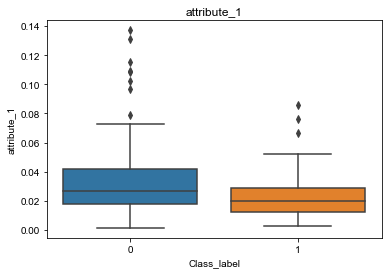

attribute_2


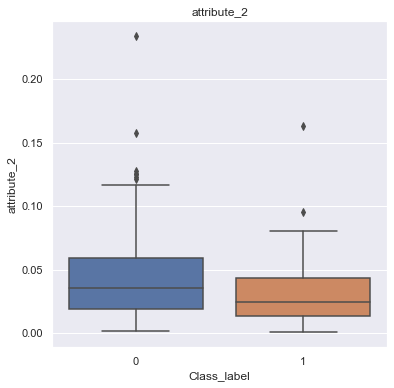

attribute_3


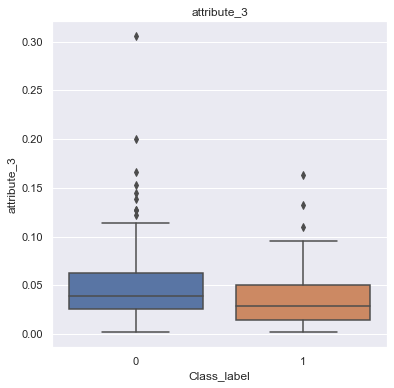

attribute_4


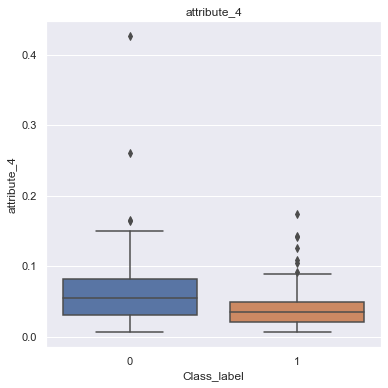

attribute_5


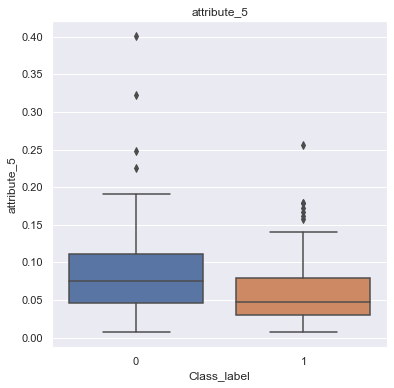

attribute_6


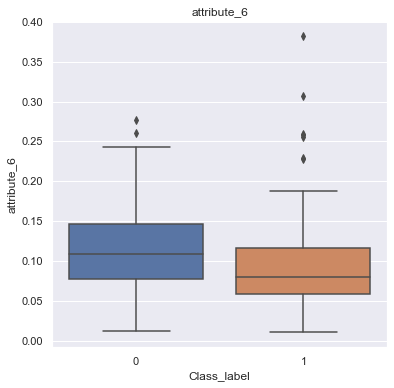

attribute_7


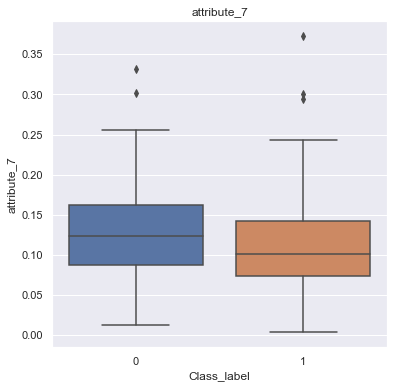

attribute_8


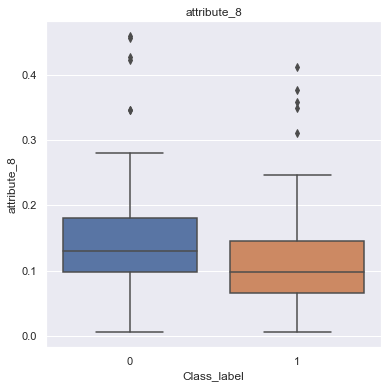

attribute_9


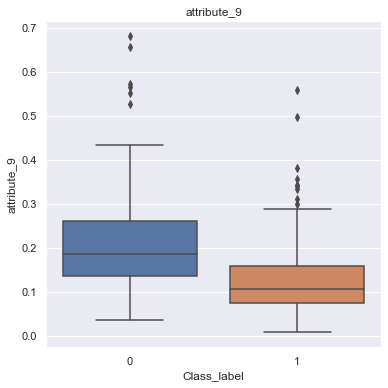

attribute_10


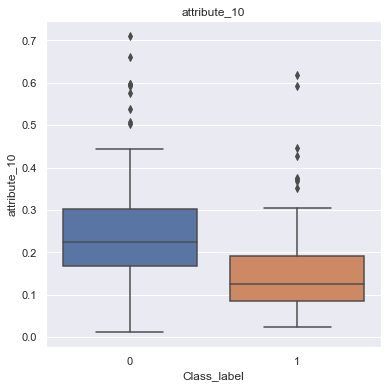

attribute_11


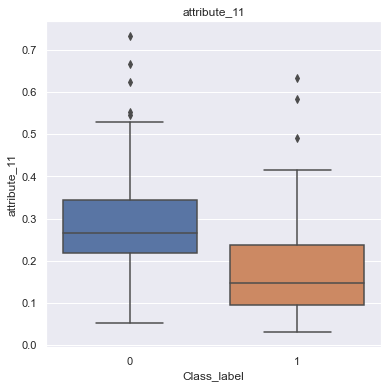

attribute_12


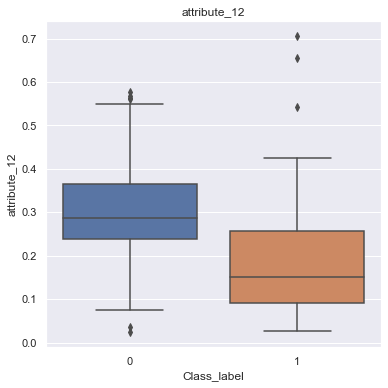

attribute_13


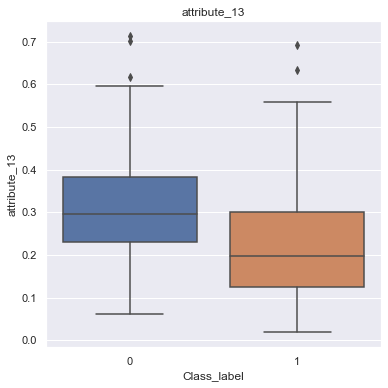

attribute_14


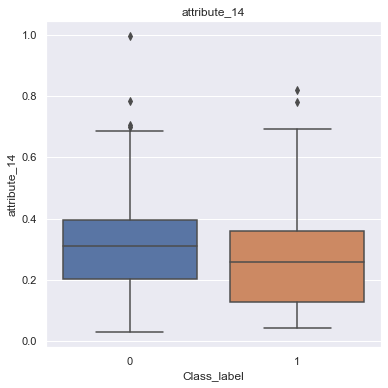

attribute_15


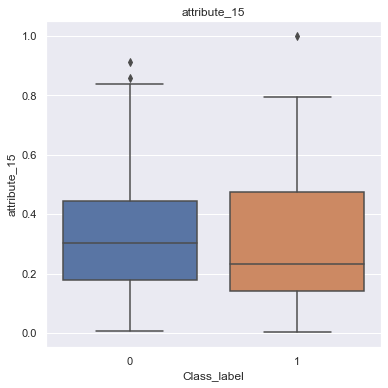

attribute_16


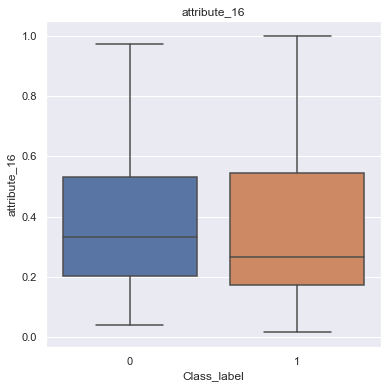

attribute_17


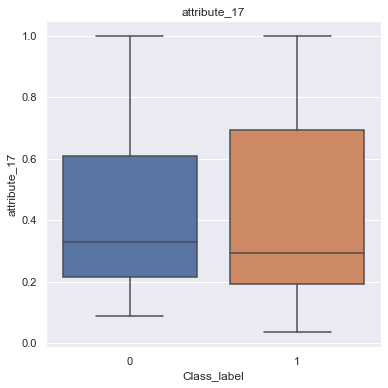

attribute_18


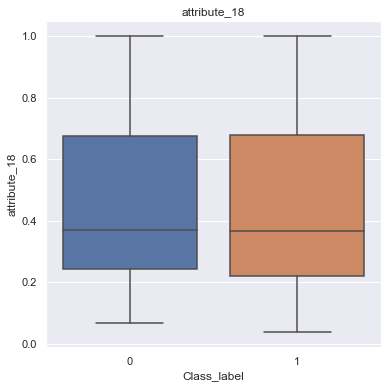

attribute_19


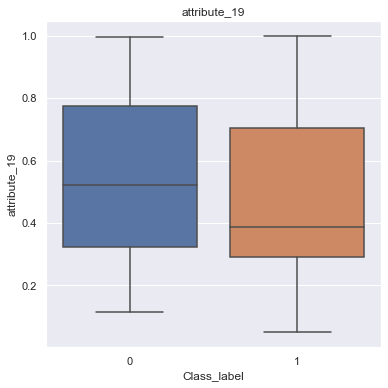

attribute_20


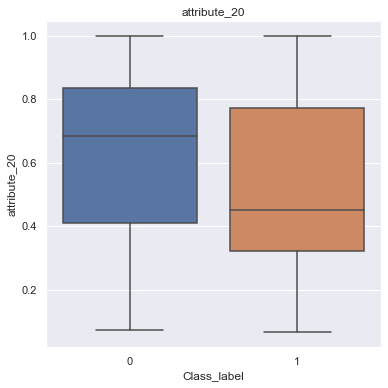

attribute_21


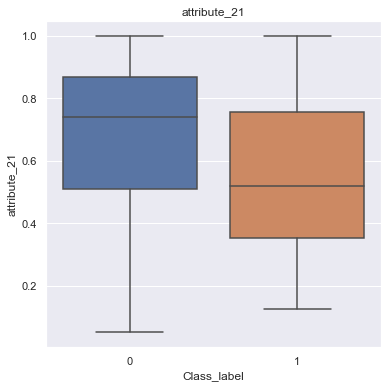

attribute_22


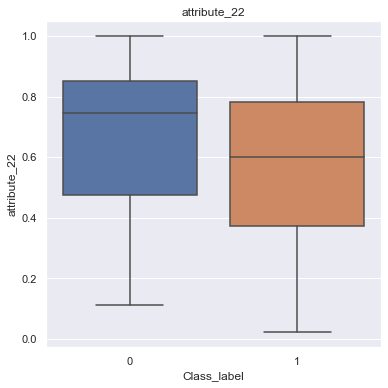

attribute_23


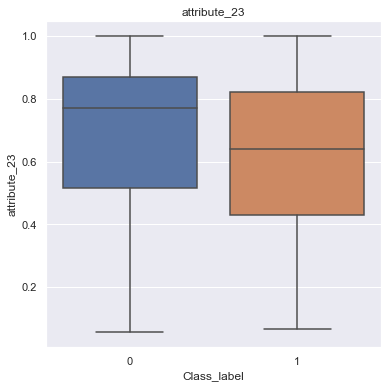

attribute_24


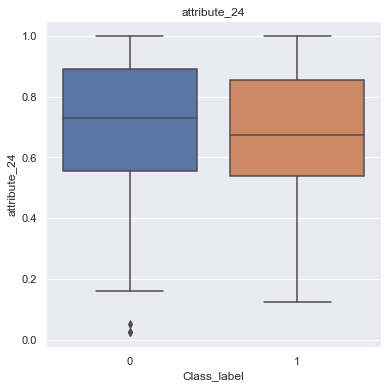

attribute_25


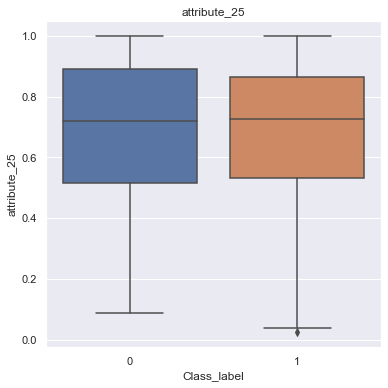

attribute_26


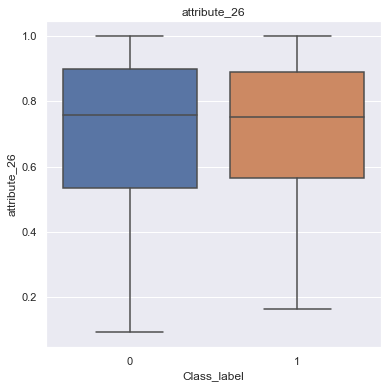

attribute_27


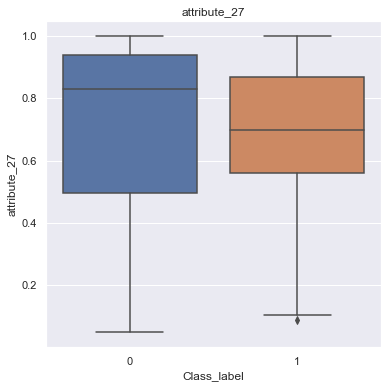

attribute_28


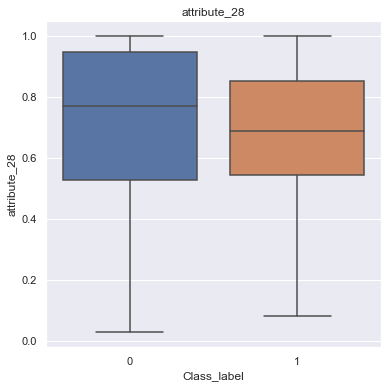

attribute_29


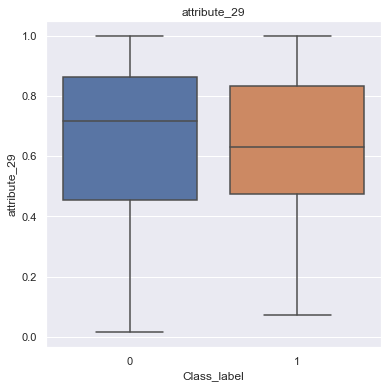

attribute_30


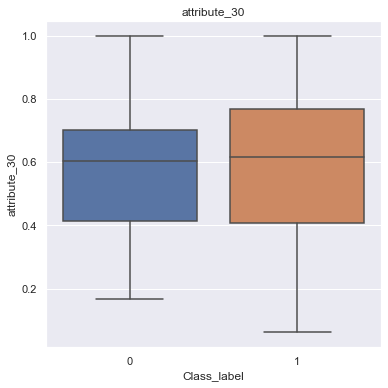

attribute_31


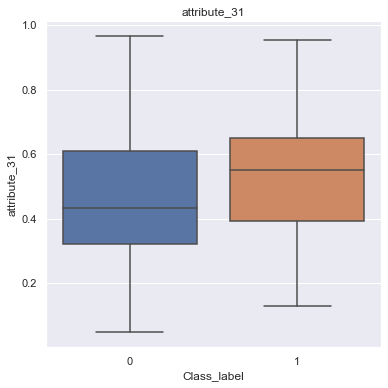

attribute_32


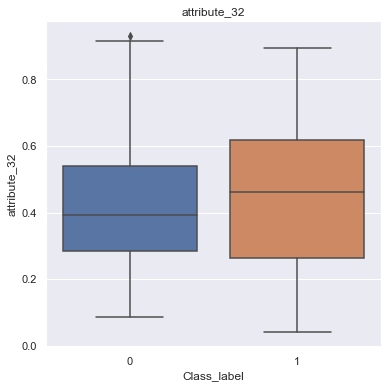

attribute_33


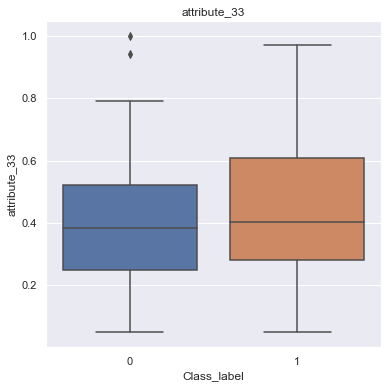

attribute_34


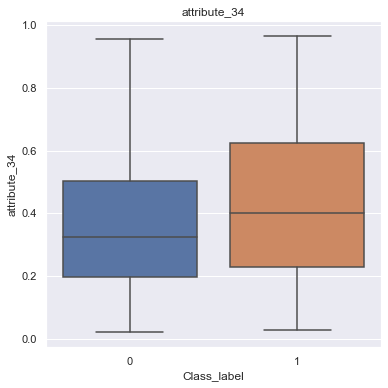

attribute_35


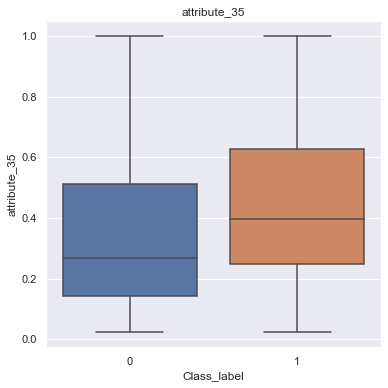

attribute_36


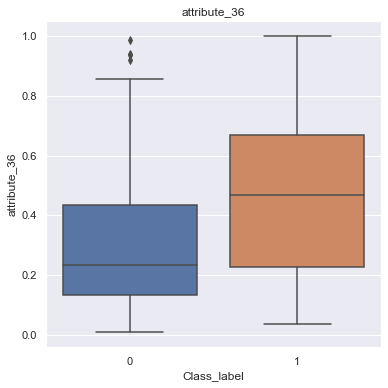

attribute_37


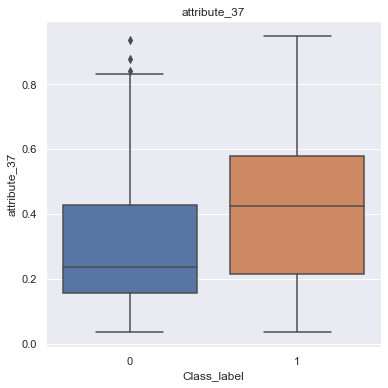

attribute_38


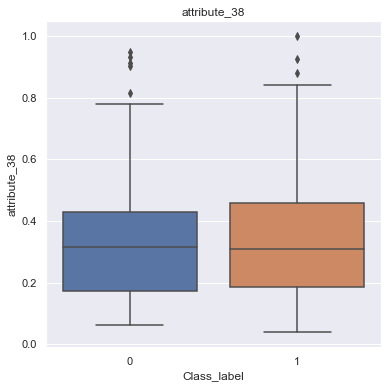

attribute_39


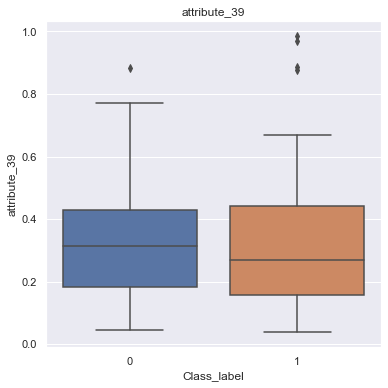

attribute_40


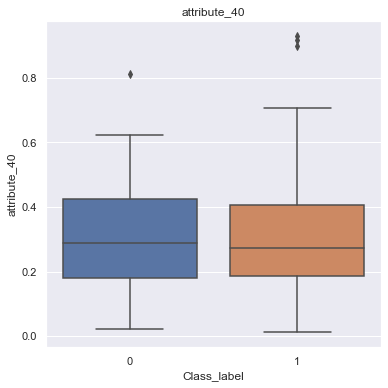

attribute_41


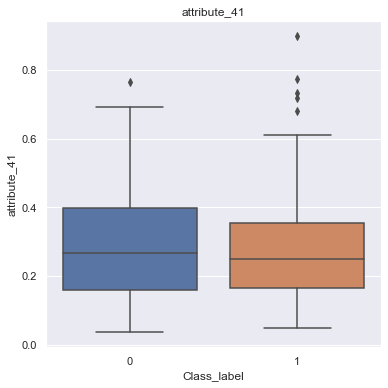

attribute_42


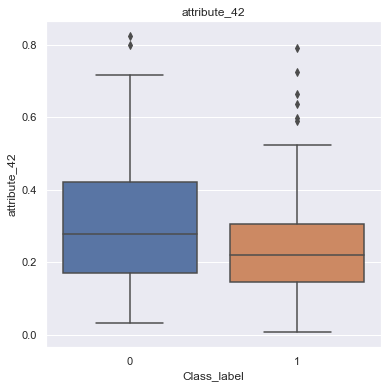

attribute_43


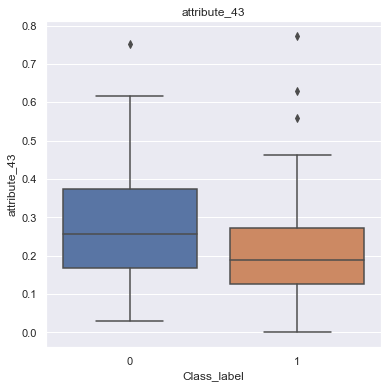

attribute_44


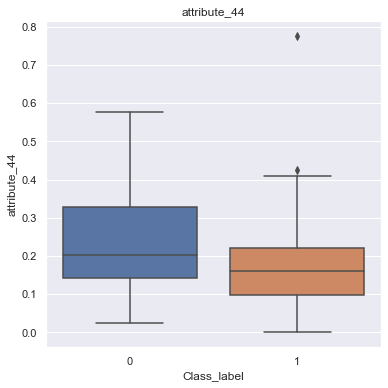

attribute_45


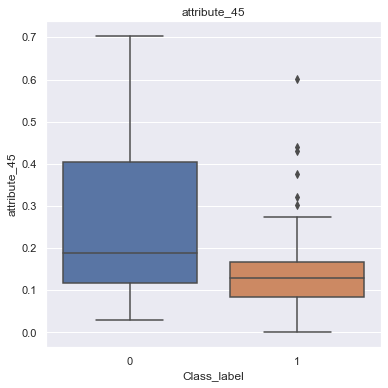

attribute_46


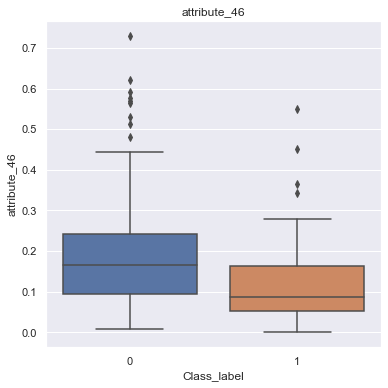

attribute_47


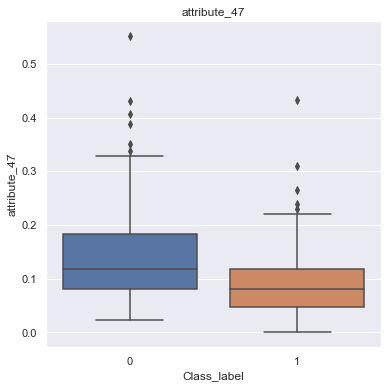

attribute_48


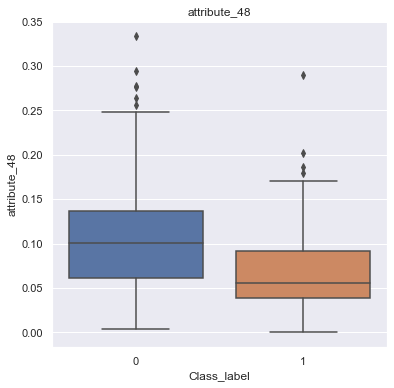

attribute_49


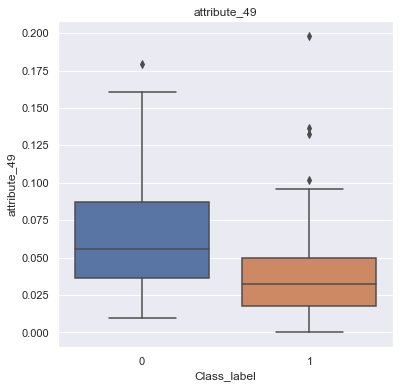

attribute_50


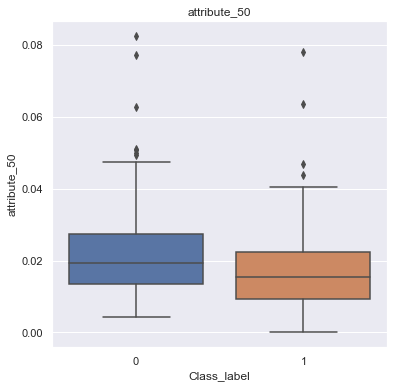

attribute_51


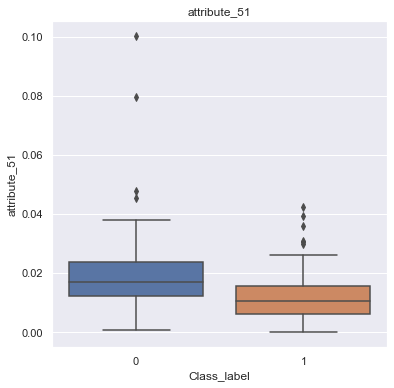

attribute_52


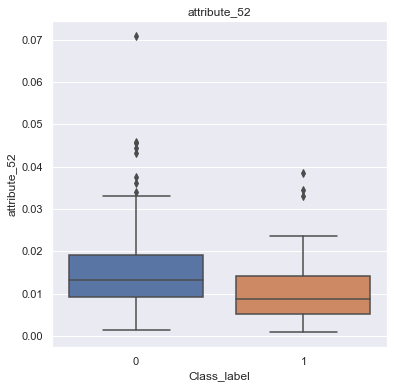

attribute_53


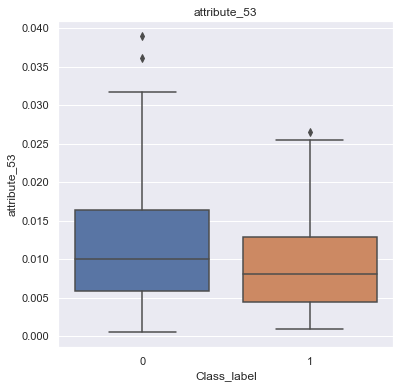

attribute_54


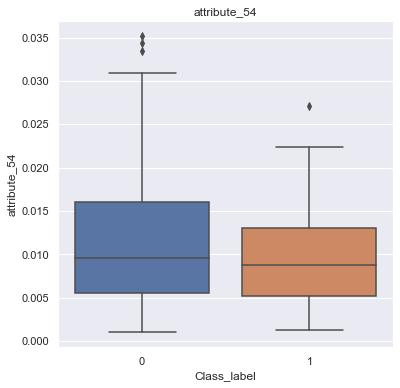

attribute_55


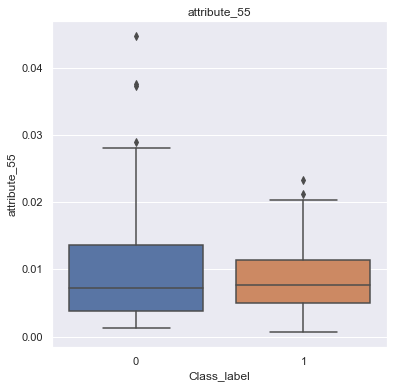

attribute_56


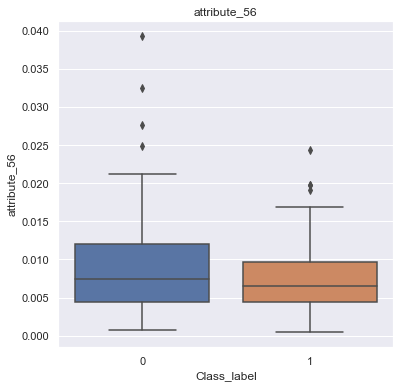

attribute_57


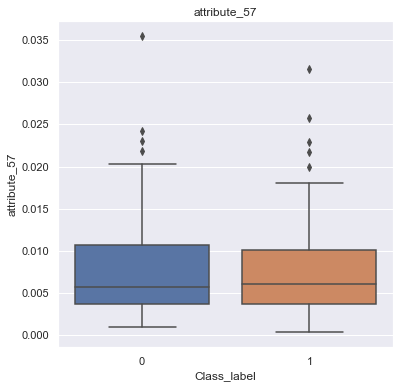

attribute_58


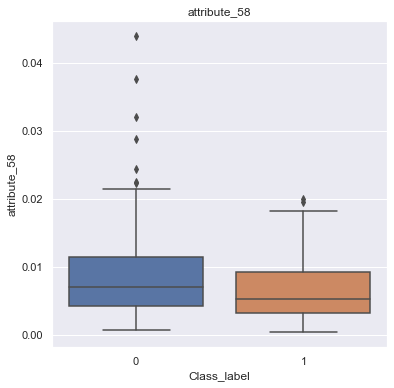

attribute_59


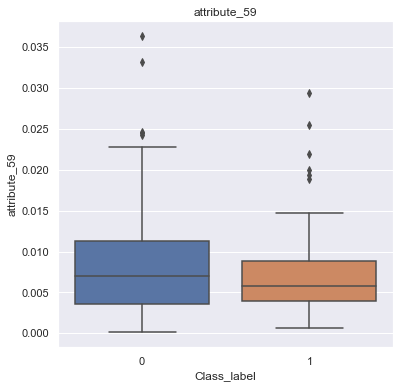

attribute_60


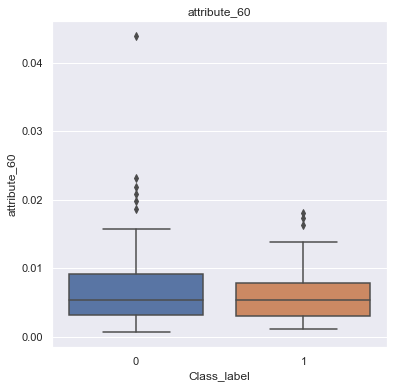

In [14]:
mask = df_1.dtypes == float
float_list = df_1.columns[mask]

for a in float_list:
    print(a)
    sns.boxplot(x='Class_label',y=a ,data=df_1, order = [0,1])
    sns.set(rc={'figure.figsize':(6,6)})
    plt.title(a)
    plt.show()

In [15]:
### Preparing for the Train, Validation and Test Data

from sklearn.model_selection import StratifiedShuffleSplit

# Split the data into two parts with ~10% of data in the test data
# This creates a generator
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=20, random_state=42)

# Get the index values from the generator
train_idx, test_idx = next(strat_shuff_split.split(df_1[feature_cols], df_1['Class_label']))

# Create the data sets
X_train = df_1.loc[train_idx, feature_cols]
y_train = df_1.loc[train_idx, 'Class_label']

X_test = df_1.loc[test_idx, feature_cols]
y_test = df_1.loc[test_idx, 'Class_label']

In [16]:
print("Train data shape: {}".format(X_train.shape))
print("Train data shape: {}".format(y_train.shape))
print("Test data shape: {}".format(X_test.shape))
print("Test data shape: {}".format(y_test.shape))

Train data shape: (188, 60)
Train data shape: (188,)
Test data shape: (20, 60)
Test data shape: (20,)


In [17]:
### Data scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scale = StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

In [18]:
### Creating a simple ANN
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf

def classifier_model():
    network = models.Sequential()
    network.add(layers.Dense(32, activation='relu', input_shape=(60,)))
    network.add(layers.Dense(1, activation='sigmoid'))
    return network

model = classifier_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1952      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,985
Trainable params: 1,985
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
### Train with SGD optimizer with 250 epochs
model = classifier_model()
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, epochs=250,  validation_split=0.106)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nTest Acc- {:.4f}: \n'.format(test_acc))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                1952      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,985
Trainable params: 1,985
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
6/6 [==============================] - 0s 54ms/step - loss: 0.6815 - accuracy: 0.5833 - val_loss: 0.7009 - val_accuracy: 0.4500
Epoch 2/250
6/6 [==============================] - 0s 7ms/step - loss: 0.6638 - accuracy: 0.5893 - val_loss: 0.6878 - val_accuracy: 0.5000
Epoch 3/250
6/6 [==============================] - 0s 8ms/step - loss: 0.6469 - accuracy: 0.5833 - val_loss: 0.6787 - val_accuracy: 0.5000
Epoch 4/250
6/6 [==============================] - 0s 8ms/step - loss: 0.6340 - accuracy: 0.6131

6/6 [==============================] - 0s 7ms/step - loss: 0.2411 - accuracy: 0.9464 - val_loss: 0.3851 - val_accuracy: 0.8500
Epoch 114/250
6/6 [==============================] - 0s 8ms/step - loss: 0.2394 - accuracy: 0.9464 - val_loss: 0.3848 - val_accuracy: 0.8500
Epoch 115/250
6/6 [==============================] - 0s 7ms/step - loss: 0.2381 - accuracy: 0.9464 - val_loss: 0.3816 - val_accuracy: 0.8500
Epoch 116/250
6/6 [==============================] - 0s 10ms/step - loss: 0.2367 - accuracy: 0.9464 - val_loss: 0.3832 - val_accuracy: 0.8500
Epoch 117/250
6/6 [==============================] - 0s 9ms/step - loss: 0.2349 - accuracy: 0.9524 - val_loss: 0.3829 - val_accuracy: 0.8500
Epoch 118/250
6/6 [==============================] - 0s 6ms/step - loss: 0.2336 - accuracy: 0.9524 - val_loss: 0.3824 - val_accuracy: 0.8500
Epoch 119/250
6/6 [==============================] - 0s 7ms/step - loss: 0.2322 - accuracy: 0.9524 - val_loss: 0.3831 - val_accuracy: 0.8500
Epoch 120/250
6/6 [=======

Epoch 171/250
6/6 [==============================] - 0s 8ms/step - loss: 0.1713 - accuracy: 0.9702 - val_loss: 0.3439 - val_accuracy: 0.9000
Epoch 172/250
6/6 [==============================] - 0s 8ms/step - loss: 0.1702 - accuracy: 0.9702 - val_loss: 0.3409 - val_accuracy: 0.9000
Epoch 173/250
6/6 [==============================] - 0s 8ms/step - loss: 0.1695 - accuracy: 0.9643 - val_loss: 0.3398 - val_accuracy: 0.9000
Epoch 174/250
6/6 [==============================] - 0s 8ms/step - loss: 0.1685 - accuracy: 0.9702 - val_loss: 0.3412 - val_accuracy: 0.9000
Epoch 175/250
6/6 [==============================] - 0s 7ms/step - loss: 0.1676 - accuracy: 0.9643 - val_loss: 0.3404 - val_accuracy: 0.9000
Epoch 176/250
6/6 [==============================] - 0s 7ms/step - loss: 0.1666 - accuracy: 0.9643 - val_loss: 0.3393 - val_accuracy: 0.9000
Epoch 177/250
6/6 [==============================] - 0s 7ms/step - loss: 0.1657 - accuracy: 0.9702 - val_loss: 0.3393 - val_accuracy: 0.9000
Epoch 178/250

In [20]:
acc=0
v_acc = 0
for a in range(-5, 0, 1):
    acc = history.history['accuracy'][a] + acc
    v_acc = history.history['val_accuracy'][a] + v_acc
print('accuracy: ', round(acc/5, 4)*100,'%')
print('val accuracy: ', round(v_acc/5, 4)*100,'%')
print('test accuracy: ', round(test_acc,4)*100,'%')

accuracy:  98.81 %
val accuracy:  90.0 %
test accuracy:  90.0 %


In [21]:
### Function for plotting
def plot_loss(history_cache):
    plt.figure(figsize=(6, 4))
    train_loss = history_cache.history['loss']
    test_loss = history_cache.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, label='Val loss')
    plt.plot(x, train_loss, label='Train loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()
    plt.show()
    
def plot_accuracy(history_cache):
    plt.figure(figsize=(6, 4))
    train_acc = history_cache.history['accuracy']
    test_acc =history_cache.history['val_accuracy']
    x = list(range(1, len(test_acc) + 1))
    plt.plot(x, test_acc, label='Val accuracy')
    plt.plot(x, train_acc, label='Train accuracy')  
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')  
    plt.legend()
    plt.show()

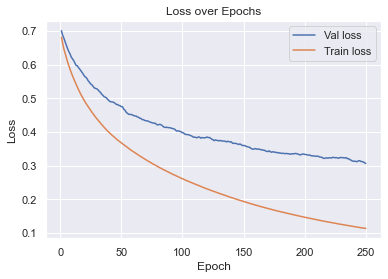

In [22]:
### SGD with the basic ANN 
plot_loss(history) 

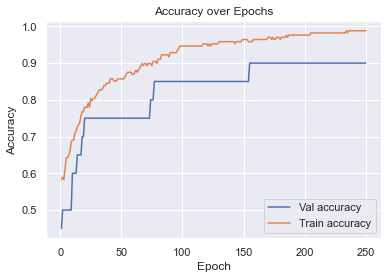

In [23]:
### SGD with the basic ANN
plot_accuracy(history)

### Adam Optimizer

In [24]:
### Using Adam optimizer with 250 epoch
model_adam = classifier_model()
model_adam.compile(optimizer=tf.keras.optimizers.Adam(), 
                   loss='binary_crossentropy', metrics=['accuracy'])
model_adam.summary()
history = model_adam.fit(X_train, y_train, epochs=250,  validation_split=0.106)
test_loss, test_acc = model_adam.evaluate(X_test, y_test)
print('\nTest Acc- {:.4f}: \n'.format(test_acc))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                1952      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,985
Trainable params: 1,985
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
6/6 [==============================] - 0s 19ms/step - loss: 0.9429 - accuracy: 0.3929 - val_loss: 0.7264 - val_accuracy: 0.5000
Epoch 2/250
6/6 [==============================] - 0s 7ms/step - loss: 0.8264 - accuracy: 0.4643 - val_loss: 0.6544 - val_accuracy: 0.5000
Epoch 3/250
6/6 [==============================] - 0s 7ms/step - loss: 0.7318 - accuracy: 0.5417 - val_loss: 0.5995 - val_accuracy: 0.6500
Epoch 4/250
6/6 [==============================] - 0s 9ms/step - loss: 0.6669 - accuracy: 0.6190

6/6 [==============================] - 0s 7ms/step - loss: 0.0351 - accuracy: 1.0000 - val_loss: 0.2892 - val_accuracy: 0.9500
Epoch 114/250
6/6 [==============================] - 0s 8ms/step - loss: 0.0344 - accuracy: 1.0000 - val_loss: 0.2909 - val_accuracy: 0.9500
Epoch 115/250
6/6 [==============================] - 0s 6ms/step - loss: 0.0337 - accuracy: 1.0000 - val_loss: 0.2918 - val_accuracy: 0.9500
Epoch 116/250
6/6 [==============================] - 0s 7ms/step - loss: 0.0331 - accuracy: 1.0000 - val_loss: 0.2947 - val_accuracy: 0.9500
Epoch 117/250
6/6 [==============================] - 0s 7ms/step - loss: 0.0325 - accuracy: 1.0000 - val_loss: 0.2955 - val_accuracy: 0.9500
Epoch 118/250
6/6 [==============================] - 0s 6ms/step - loss: 0.0319 - accuracy: 1.0000 - val_loss: 0.2961 - val_accuracy: 0.9500
Epoch 119/250
6/6 [==============================] - 0s 7ms/step - loss: 0.0313 - accuracy: 1.0000 - val_loss: 0.2975 - val_accuracy: 0.9500
Epoch 120/250
6/6 [========

6/6 [==============================] - 0s 9ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.3027 - val_accuracy: 0.9500
Epoch 230/250
6/6 [==============================] - 0s 7ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.3009 - val_accuracy: 0.9500
Epoch 231/250
6/6 [==============================] - 0s 6ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.3001 - val_accuracy: 0.9500
Epoch 232/250
6/6 [==============================] - 0s 7ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.3002 - val_accuracy: 0.9500
Epoch 233/250
6/6 [==============================] - 0s 7ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.3007 - val_accuracy: 0.9500
Epoch 234/250
6/6 [==============================] - 0s 7ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.3022 - val_accuracy: 0.9500
Epoch 235/250
6/6 [==============================] - 0s 7ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.3024 - val_accuracy: 0.9500
Epoch 236/250
6/6 [========

In [25]:
acc=0
v_acc = 0
for a in range(-5, 0, 1):
    acc = history.history['accuracy'][a] + acc
    v_acc = history.history['val_accuracy'][a] + v_acc
print('accuracy: ', round(acc/5, 4)*100,'%')
print('val accuracy: ', round(v_acc/5, 4)*100,'%')
print('test accuracy: ', round(test_acc,4)*100,'%')

accuracy:  100.0 %
val accuracy:  95.0 %
test accuracy:  85.0 %


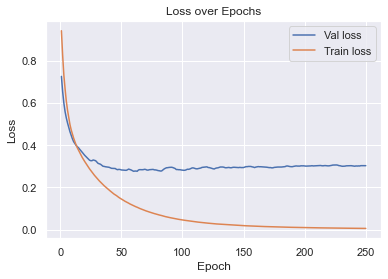

In [26]:
plot_loss(history) 

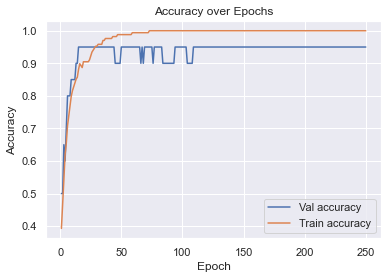

In [27]:
plot_accuracy(history)

### RMSprop Optimizer

In [28]:
### Using RMSprop optimizer with 250 epoch
model_RMS = classifier_model()
model_RMS.compile(optimizer=tf.keras.optimizers.RMSprop(), 
                   loss='binary_crossentropy', metrics=['accuracy'])
model_RMS.summary()
history = model_RMS.fit(X_train, y_train, epochs=250,  validation_split=0.106)
test_loss, test_acc = model_RMS.evaluate(X_test, y_test)
print('\nTest Acc- {:.4f}: \n'.format(test_acc))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                1952      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 1,985
Trainable params: 1,985
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
6/6 [==============================] - 0s 20ms/step - loss: 0.8927 - accuracy: 0.4762 - val_loss: 0.8387 - val_accuracy: 0.4000
Epoch 2/250
6/6 [==============================] - 0s 7ms/step - loss: 0.7309 - accuracy: 0.5417 - val_loss: 0.7546 - val_accuracy: 0.5500
Epoch 3/250
6/6 [==============================] - 0s 7ms/step - loss: 0.6586 - accuracy: 0.5893 - val_loss: 0.6911 - val_accuracy: 0.6500
Epoch 4/250
6/6 [==============================] - 0s 8ms/step - loss: 0.6032 - accuracy: 0.6488

6/6 [==============================] - 0s 8ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.4093 - val_accuracy: 0.9000
Epoch 114/250
6/6 [==============================] - 0s 8ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.4215 - val_accuracy: 0.9000
Epoch 115/250
6/6 [==============================] - 0s 8ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.4112 - val_accuracy: 0.9000
Epoch 116/250
6/6 [==============================] - 0s 9ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.4042 - val_accuracy: 0.9000
Epoch 117/250
6/6 [==============================] - 0s 8ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.3986 - val_accuracy: 0.9000
Epoch 118/250
6/6 [==============================] - 0s 7ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.4061 - val_accuracy: 0.9000
Epoch 119/250
6/6 [==============================] - 0s 6ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.4277 - val_accuracy: 0.9000
Epoch 120/250
6/6 [========

6/6 [==============================] - 0s 7ms/step - loss: 9.8368e-07 - accuracy: 1.0000 - val_loss: 0.7300 - val_accuracy: 0.9000
Epoch 227/250
6/6 [==============================] - 0s 8ms/step - loss: 8.9473e-07 - accuracy: 1.0000 - val_loss: 0.7449 - val_accuracy: 0.9000
Epoch 228/250
6/6 [==============================] - 0s 6ms/step - loss: 8.2642e-07 - accuracy: 1.0000 - val_loss: 0.7530 - val_accuracy: 0.9000
Epoch 229/250
6/6 [==============================] - 0s 7ms/step - loss: 7.9040e-07 - accuracy: 1.0000 - val_loss: 0.7571 - val_accuracy: 0.9000
Epoch 230/250
6/6 [==============================] - 0s 7ms/step - loss: 7.2215e-07 - accuracy: 1.0000 - val_loss: 0.7458 - val_accuracy: 0.9000
Epoch 231/250
6/6 [==============================] - 0s 7ms/step - loss: 6.7039e-07 - accuracy: 1.0000 - val_loss: 0.7583 - val_accuracy: 0.9000
Epoch 232/250
6/6 [==============================] - 0s 8ms/step - loss: 6.2003e-07 - accuracy: 1.0000 - val_loss: 0.7435 - val_accuracy: 0.9000

In [29]:
acc=0
v_acc = 0
for a in range(-5, 0, 1):
    acc = history.history['accuracy'][a] + acc
    v_acc = history.history['val_accuracy'][a] + v_acc
print('accuracy: ', round(acc/5, 4)*100,'%')
print('val accuracy: ', round(v_acc/5, 4)*100,'%')
print('test accuracy: ', round(test_acc,4)*100,'%')

accuracy:  100.0 %
val accuracy:  90.0 %
test accuracy:  90.0 %


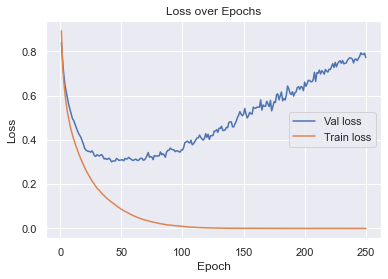

In [30]:
plot_loss(history) 

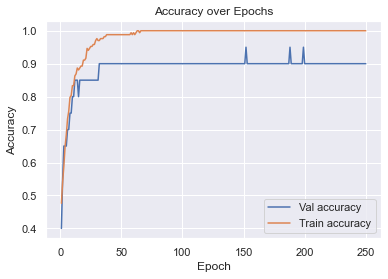

In [31]:
plot_accuracy(history)

### With simple ANN Dense 32 and Dense 1 at the output, the optimizer Adam and RMSprop are overfitting.

### Will modify the Adam optimizer by introducing learning rate to prevent overfitting.

In [32]:
### Using Adam optimizer with 3000 epoch and learning rate = 0.00001
model_adam = classifier_model()
model_adam.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), 
                   loss='binary_crossentropy', metrics=['accuracy'])
model_adam.summary()
history = model_adam.fit(X_train, y_train, epochs=3000,  validation_split=0.106)
test_loss, test_acc = model_adam.evaluate(X_test, y_test)
print('\nTest Acc- {:.4f}: \n'.format(test_acc))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                1952      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 1,985
Trainable params: 1,985
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3000
6/6 [==============================] - 0s 18ms/step - loss: 0.8581 - accuracy: 0.5060 - val_loss: 1.0357 - val_accuracy: 0.2500
Epoch 2/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.8569 - accuracy: 0.5060 - val_loss: 1.0342 - val_accuracy: 0.2500
Epoch 3/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.8558 - accuracy: 0.5060 - val_loss: 1.0326 - val_accuracy: 0.2500
Epoch 4/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.8547 - accuracy: 0.

Epoch 55/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.8024 - accuracy: 0.5000 - val_loss: 0.9600 - val_accuracy: 0.3000
Epoch 56/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.8015 - accuracy: 0.5000 - val_loss: 0.9587 - val_accuracy: 0.3000
Epoch 57/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.8005 - accuracy: 0.5000 - val_loss: 0.9574 - val_accuracy: 0.3000
Epoch 58/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.7996 - accuracy: 0.5000 - val_loss: 0.9562 - val_accuracy: 0.3000
Epoch 59/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.7986 - accuracy: 0.5000 - val_loss: 0.9550 - val_accuracy: 0.3000
Epoch 60/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.7977 - accuracy: 0.5000 - val_loss: 0.9538 - val_accuracy: 0.3000
Epoch 61/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.7968 - accuracy: 0.5000 - val_loss: 0.9526 - val_accuracy: 0.3000
Epoch 62/3000

6/6 [==============================] - 0s 6ms/step - loss: 0.7502 - accuracy: 0.5298 - val_loss: 0.8877 - val_accuracy: 0.3000
Epoch 114/3000
6/6 [==============================] - ETA: 0s - loss: 0.7734 - accuracy: 0.56 - 0s 8ms/step - loss: 0.7494 - accuracy: 0.5298 - val_loss: 0.8865 - val_accuracy: 0.3000
Epoch 115/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.7485 - accuracy: 0.5298 - val_loss: 0.8853 - val_accuracy: 0.3000
Epoch 116/3000
6/6 [==============================] - 0s 9ms/step - loss: 0.7476 - accuracy: 0.5298 - val_loss: 0.8841 - val_accuracy: 0.3000
Epoch 117/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.7468 - accuracy: 0.5298 - val_loss: 0.8830 - val_accuracy: 0.3000
Epoch 118/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.7460 - accuracy: 0.5298 - val_loss: 0.8818 - val_accuracy: 0.3000
Epoch 119/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.7451 - accuracy: 0.5357 - val_loss: 0.8806 - 

6/6 [==============================] - 0s 8ms/step - loss: 0.6627 - accuracy: 0.5655 - val_loss: 0.7682 - val_accuracy: 0.3500
Epoch 228/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.6620 - accuracy: 0.5655 - val_loss: 0.7673 - val_accuracy: 0.3500
Epoch 229/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.6613 - accuracy: 0.5655 - val_loss: 0.7665 - val_accuracy: 0.3500
Epoch 230/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.6607 - accuracy: 0.5655 - val_loss: 0.7656 - val_accuracy: 0.3500
Epoch 231/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.6600 - accuracy: 0.5655 - val_loss: 0.7647 - val_accuracy: 0.3500
Epoch 232/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.6593 - accuracy: 0.5655 - val_loss: 0.7639 - val_accuracy: 0.3500
Epoch 233/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.6587 - accuracy: 0.5655 - val_loss: 0.7630 - val_accuracy: 0.3500
Epoch 234/3000
6/6 [=

Epoch 285/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.6248 - accuracy: 0.6012 - val_loss: 0.7184 - val_accuracy: 0.4500
Epoch 286/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.6241 - accuracy: 0.6012 - val_loss: 0.7175 - val_accuracy: 0.4500
Epoch 287/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.6234 - accuracy: 0.6012 - val_loss: 0.7167 - val_accuracy: 0.4500
Epoch 288/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.6228 - accuracy: 0.6012 - val_loss: 0.7158 - val_accuracy: 0.4500
Epoch 289/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.6222 - accuracy: 0.6012 - val_loss: 0.7151 - val_accuracy: 0.4500
Epoch 290/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.6216 - accuracy: 0.6012 - val_loss: 0.7143 - val_accuracy: 0.4500
Epoch 291/3000
6/6 [==============================] - 0s 9ms/step - loss: 0.6210 - accuracy: 0.6012 - val_loss: 0.7135 - val_accuracy: 0.4500
Epoch 

Epoch 343/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.5905 - accuracy: 0.6429 - val_loss: 0.6746 - val_accuracy: 0.6000
Epoch 344/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.5900 - accuracy: 0.6429 - val_loss: 0.6738 - val_accuracy: 0.6000
Epoch 345/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.5894 - accuracy: 0.6429 - val_loss: 0.6731 - val_accuracy: 0.6000
Epoch 346/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.5888 - accuracy: 0.6429 - val_loss: 0.6722 - val_accuracy: 0.6000
Epoch 347/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.5883 - accuracy: 0.6429 - val_loss: 0.6714 - val_accuracy: 0.6000
Epoch 348/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.5877 - accuracy: 0.6429 - val_loss: 0.6706 - val_accuracy: 0.6000
Epoch 349/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.5871 - accuracy: 0.6429 - val_loss: 0.6698 - val_accuracy: 0.6000
Epoch 

Epoch 401/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.5601 - accuracy: 0.6667 - val_loss: 0.6351 - val_accuracy: 0.6500
Epoch 402/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.5596 - accuracy: 0.6667 - val_loss: 0.6344 - val_accuracy: 0.6500
Epoch 403/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.5591 - accuracy: 0.6667 - val_loss: 0.6338 - val_accuracy: 0.6500
Epoch 404/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.5586 - accuracy: 0.6667 - val_loss: 0.6331 - val_accuracy: 0.6500
Epoch 405/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.5581 - accuracy: 0.6667 - val_loss: 0.6325 - val_accuracy: 0.6500
Epoch 406/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.5576 - accuracy: 0.6667 - val_loss: 0.6319 - val_accuracy: 0.6500
Epoch 407/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.5572 - accuracy: 0.6667 - val_loss: 0.6314 - val_accuracy: 0.6500
Epoch 

Epoch 459/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.5333 - accuracy: 0.6964 - val_loss: 0.6017 - val_accuracy: 0.7000
Epoch 460/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.5328 - accuracy: 0.6964 - val_loss: 0.6012 - val_accuracy: 0.7000
Epoch 461/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.5324 - accuracy: 0.6964 - val_loss: 0.6006 - val_accuracy: 0.7000
Epoch 462/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.5320 - accuracy: 0.6964 - val_loss: 0.6001 - val_accuracy: 0.7000
Epoch 463/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.5315 - accuracy: 0.6964 - val_loss: 0.5995 - val_accuracy: 0.7000
Epoch 464/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.5311 - accuracy: 0.6964 - val_loss: 0.5990 - val_accuracy: 0.7000
Epoch 465/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.5306 - accuracy: 0.6964 - val_loss: 0.5985 - val_accuracy: 0.7000
Epoch 

Epoch 517/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.5089 - accuracy: 0.7381 - val_loss: 0.5713 - val_accuracy: 0.7500
Epoch 518/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.5085 - accuracy: 0.7381 - val_loss: 0.5708 - val_accuracy: 0.7500
Epoch 519/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.5081 - accuracy: 0.7381 - val_loss: 0.5703 - val_accuracy: 0.7500
Epoch 520/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.5077 - accuracy: 0.7381 - val_loss: 0.5698 - val_accuracy: 0.7500
Epoch 521/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.5073 - accuracy: 0.7381 - val_loss: 0.5694 - val_accuracy: 0.7500
Epoch 522/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.5069 - accuracy: 0.7381 - val_loss: 0.5689 - val_accuracy: 0.7500
Epoch 523/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.5065 - accuracy: 0.7381 - val_loss: 0.5684 - val_accuracy: 0.7500
Epoch 

Epoch 632/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.4672 - accuracy: 0.7619 - val_loss: 0.5208 - val_accuracy: 0.8500
Epoch 633/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.4669 - accuracy: 0.7619 - val_loss: 0.5204 - val_accuracy: 0.8500
Epoch 634/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.4666 - accuracy: 0.7619 - val_loss: 0.5201 - val_accuracy: 0.8500
Epoch 635/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.4663 - accuracy: 0.7619 - val_loss: 0.5198 - val_accuracy: 0.8500
Epoch 636/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.4660 - accuracy: 0.7619 - val_loss: 0.5194 - val_accuracy: 0.8500
Epoch 637/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.4657 - accuracy: 0.7619 - val_loss: 0.5190 - val_accuracy: 0.8500
Epoch 638/3000
6/6 [==============================] - 0s 31ms/step - loss: 0.4653 - accuracy: 0.7619 - val_loss: 0.5186 - val_accuracy: 0.8500
Epoch

Epoch 690/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.4491 - accuracy: 0.7738 - val_loss: 0.4999 - val_accuracy: 0.8500
Epoch 691/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.4488 - accuracy: 0.7738 - val_loss: 0.4996 - val_accuracy: 0.8500
Epoch 692/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.4485 - accuracy: 0.7738 - val_loss: 0.4993 - val_accuracy: 0.8500
Epoch 693/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.4482 - accuracy: 0.7798 - val_loss: 0.4990 - val_accuracy: 0.8500
Epoch 694/3000
6/6 [==============================] - 0s 9ms/step - loss: 0.4479 - accuracy: 0.7798 - val_loss: 0.4987 - val_accuracy: 0.8500
Epoch 695/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.4476 - accuracy: 0.7798 - val_loss: 0.4984 - val_accuracy: 0.8500
Epoch 696/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.4473 - accuracy: 0.7798 - val_loss: 0.4980 - val_accuracy: 0.8500
Epoch 

Epoch 748/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.4323 - accuracy: 0.8036 - val_loss: 0.4812 - val_accuracy: 0.8500
Epoch 749/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.4320 - accuracy: 0.8036 - val_loss: 0.4809 - val_accuracy: 0.8500
Epoch 750/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.4318 - accuracy: 0.8036 - val_loss: 0.4807 - val_accuracy: 0.8500
Epoch 751/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.4315 - accuracy: 0.8036 - val_loss: 0.4804 - val_accuracy: 0.8500
Epoch 752/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.4312 - accuracy: 0.8036 - val_loss: 0.4800 - val_accuracy: 0.8500
Epoch 753/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.4309 - accuracy: 0.8036 - val_loss: 0.4798 - val_accuracy: 0.8500
Epoch 754/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.4306 - accuracy: 0.8036 - val_loss: 0.4795 - val_accuracy: 0.8500
Epoch 

Epoch 863/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.4025 - accuracy: 0.8393 - val_loss: 0.4493 - val_accuracy: 0.8500
Epoch 864/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.4022 - accuracy: 0.8393 - val_loss: 0.4490 - val_accuracy: 0.8500
Epoch 865/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.4020 - accuracy: 0.8393 - val_loss: 0.4488 - val_accuracy: 0.8500
Epoch 866/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.4017 - accuracy: 0.8393 - val_loss: 0.4485 - val_accuracy: 0.8500
Epoch 867/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.4015 - accuracy: 0.8393 - val_loss: 0.4483 - val_accuracy: 0.8500
Epoch 868/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.4012 - accuracy: 0.8393 - val_loss: 0.4481 - val_accuracy: 0.8500
Epoch 869/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.4010 - accuracy: 0.8393 - val_loss: 0.4479 - val_accuracy: 0.8500
Epoch 

6/6 [==============================] - 0s 7ms/step - loss: 0.3763 - accuracy: 0.8631 - val_loss: 0.4241 - val_accuracy: 0.8500
Epoch 978/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.3761 - accuracy: 0.8690 - val_loss: 0.4239 - val_accuracy: 0.8500
Epoch 979/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.3759 - accuracy: 0.8690 - val_loss: 0.4236 - val_accuracy: 0.8500
Epoch 980/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.3757 - accuracy: 0.8690 - val_loss: 0.4234 - val_accuracy: 0.8500
Epoch 981/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.3754 - accuracy: 0.8690 - val_loss: 0.4233 - val_accuracy: 0.8500
Epoch 982/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.3752 - accuracy: 0.8690 - val_loss: 0.4231 - val_accuracy: 0.8500
Epoch 983/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.3750 - accuracy: 0.8690 - val_loss: 0.4229 - val_accuracy: 0.8500
Epoch 984/3000
6/6 [=

6/6 [==============================] - 0s 9ms/step - loss: 0.3533 - accuracy: 0.8750 - val_loss: 0.4026 - val_accuracy: 0.8500
Epoch 1092/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.3531 - accuracy: 0.8750 - val_loss: 0.4024 - val_accuracy: 0.8500
Epoch 1093/3000
6/6 [==============================] - 0s 12ms/step - loss: 0.3529 - accuracy: 0.8750 - val_loss: 0.4022 - val_accuracy: 0.8500
Epoch 1094/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.3528 - accuracy: 0.8810 - val_loss: 0.4021 - val_accuracy: 0.8500
Epoch 1095/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.3526 - accuracy: 0.8810 - val_loss: 0.4019 - val_accuracy: 0.8500
Epoch 1096/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.3524 - accuracy: 0.8810 - val_loss: 0.4017 - val_accuracy: 0.8500
Epoch 1097/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.3522 - accuracy: 0.8869 - val_loss: 0.4015 - val_accuracy: 0.8500
Epoch 1098/300

6/6 [==============================] - 0s 8ms/step - loss: 0.3326 - accuracy: 0.9107 - val_loss: 0.3833 - val_accuracy: 0.8500
Epoch 1206/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.3325 - accuracy: 0.9107 - val_loss: 0.3832 - val_accuracy: 0.8500
Epoch 1207/3000
6/6 [==============================] - 0s 9ms/step - loss: 0.3323 - accuracy: 0.9107 - val_loss: 0.3831 - val_accuracy: 0.8500
Epoch 1208/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.3321 - accuracy: 0.9107 - val_loss: 0.3829 - val_accuracy: 0.8500
Epoch 1209/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.3319 - accuracy: 0.9107 - val_loss: 0.3828 - val_accuracy: 0.8500
Epoch 1210/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.3318 - accuracy: 0.9107 - val_loss: 0.3827 - val_accuracy: 0.8500
Epoch 1211/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.3316 - accuracy: 0.9107 - val_loss: 0.3826 - val_accuracy: 0.8500
Epoch 1212/3000

6/6 [==============================] - 0s 7ms/step - loss: 0.3139 - accuracy: 0.9286 - val_loss: 0.3668 - val_accuracy: 0.8500
Epoch 1320/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.3137 - accuracy: 0.9286 - val_loss: 0.3667 - val_accuracy: 0.8500
Epoch 1321/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.3135 - accuracy: 0.9286 - val_loss: 0.3666 - val_accuracy: 0.8500
Epoch 1322/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.3134 - accuracy: 0.9286 - val_loss: 0.3664 - val_accuracy: 0.8500
Epoch 1323/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.3132 - accuracy: 0.9286 - val_loss: 0.3663 - val_accuracy: 0.8500
Epoch 1324/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.3131 - accuracy: 0.9286 - val_loss: 0.3661 - val_accuracy: 0.8500
Epoch 1325/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.3129 - accuracy: 0.9286 - val_loss: 0.3660 - val_accuracy: 0.8500
Epoch 1326/3000

6/6 [==============================] - 0s 8ms/step - loss: 0.2968 - accuracy: 0.9286 - val_loss: 0.3506 - val_accuracy: 0.8500
Epoch 1434/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.2966 - accuracy: 0.9286 - val_loss: 0.3505 - val_accuracy: 0.8500
Epoch 1435/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2965 - accuracy: 0.9286 - val_loss: 0.3503 - val_accuracy: 0.8500
Epoch 1436/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2964 - accuracy: 0.9286 - val_loss: 0.3502 - val_accuracy: 0.8500
Epoch 1437/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2962 - accuracy: 0.9286 - val_loss: 0.3500 - val_accuracy: 0.8500
Epoch 1438/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2961 - accuracy: 0.9286 - val_loss: 0.3499 - val_accuracy: 0.8500
Epoch 1439/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2959 - accuracy: 0.9286 - val_loss: 0.3498 - val_accuracy: 0.8500
Epoch 1440/3000

6/6 [==============================] - 0s 9ms/step - loss: 0.2814 - accuracy: 0.9345 - val_loss: 0.3371 - val_accuracy: 0.8500
Epoch 1548/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.2813 - accuracy: 0.9345 - val_loss: 0.3369 - val_accuracy: 0.8500
Epoch 1549/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.2811 - accuracy: 0.9345 - val_loss: 0.3368 - val_accuracy: 0.8500
Epoch 1550/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.2810 - accuracy: 0.9345 - val_loss: 0.3367 - val_accuracy: 0.8500
Epoch 1551/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.2809 - accuracy: 0.9345 - val_loss: 0.3366 - val_accuracy: 0.8500
Epoch 1552/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2808 - accuracy: 0.9345 - val_loss: 0.3365 - val_accuracy: 0.8500
Epoch 1553/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.2806 - accuracy: 0.9345 - val_loss: 0.3364 - val_accuracy: 0.8500
Epoch 1554/3000

6/6 [==============================] - 0s 9ms/step - loss: 0.2671 - accuracy: 0.9405 - val_loss: 0.3243 - val_accuracy: 0.8500
Epoch 1662/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2669 - accuracy: 0.9405 - val_loss: 0.3242 - val_accuracy: 0.8500
Epoch 1663/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.2668 - accuracy: 0.9405 - val_loss: 0.3241 - val_accuracy: 0.8500
Epoch 1664/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2667 - accuracy: 0.9405 - val_loss: 0.3240 - val_accuracy: 0.8500
Epoch 1665/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.2666 - accuracy: 0.9405 - val_loss: 0.3240 - val_accuracy: 0.8500
Epoch 1666/3000
6/6 [==============================] - 0s 9ms/step - loss: 0.2665 - accuracy: 0.9405 - val_loss: 0.3238 - val_accuracy: 0.8500
Epoch 1667/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.2663 - accuracy: 0.9405 - val_loss: 0.3237 - val_accuracy: 0.8500
Epoch 1668/3000

6/6 [==============================] - 0s 7ms/step - loss: 0.2537 - accuracy: 0.9524 - val_loss: 0.3130 - val_accuracy: 0.9000
Epoch 1776/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.2536 - accuracy: 0.9524 - val_loss: 0.3130 - val_accuracy: 0.9000
Epoch 1777/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2535 - accuracy: 0.9524 - val_loss: 0.3129 - val_accuracy: 0.9000
Epoch 1778/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.2534 - accuracy: 0.9524 - val_loss: 0.3128 - val_accuracy: 0.9000
Epoch 1779/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.2533 - accuracy: 0.9583 - val_loss: 0.3128 - val_accuracy: 0.9000
Epoch 1780/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2531 - accuracy: 0.9583 - val_loss: 0.3127 - val_accuracy: 0.9000
Epoch 1781/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2530 - accuracy: 0.9583 - val_loss: 0.3127 - val_accuracy: 0.9000
Epoch 1782/3000

6/6 [==============================] - 0s 7ms/step - loss: 0.2413 - accuracy: 0.9643 - val_loss: 0.3035 - val_accuracy: 0.9000
Epoch 1890/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2412 - accuracy: 0.9643 - val_loss: 0.3034 - val_accuracy: 0.9000
Epoch 1891/3000
6/6 [==============================] - 0s 10ms/step - loss: 0.2410 - accuracy: 0.9643 - val_loss: 0.3033 - val_accuracy: 0.9000
Epoch 1892/3000
6/6 [==============================] - 0s 39ms/step - loss: 0.2409 - accuracy: 0.9643 - val_loss: 0.3032 - val_accuracy: 0.9000
Epoch 1893/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2408 - accuracy: 0.9643 - val_loss: 0.3031 - val_accuracy: 0.9000
Epoch 1894/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2407 - accuracy: 0.9643 - val_loss: 0.3030 - val_accuracy: 0.9000
Epoch 1895/3000
6/6 [==============================] - 0s 9ms/step - loss: 0.2406 - accuracy: 0.9643 - val_loss: 0.3029 - val_accuracy: 0.9000
Epoch 1896/30

6/6 [==============================] - 0s 6ms/step - loss: 0.2354 - accuracy: 0.9643 - val_loss: 0.2985 - val_accuracy: 0.9000
Epoch 1947/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.2353 - accuracy: 0.9643 - val_loss: 0.2985 - val_accuracy: 0.9000
Epoch 1948/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2352 - accuracy: 0.9643 - val_loss: 0.2984 - val_accuracy: 0.9000
Epoch 1949/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2351 - accuracy: 0.9643 - val_loss: 0.2983 - val_accuracy: 0.9000
Epoch 1950/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2350 - accuracy: 0.9643 - val_loss: 0.2982 - val_accuracy: 0.9000
Epoch 1951/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2349 - accuracy: 0.9643 - val_loss: 0.2982 - val_accuracy: 0.9000
Epoch 1952/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2348 - accuracy: 0.9643 - val_loss: 0.2981 - val_accuracy: 0.9000
Epoch 1953/3000

6/6 [==============================] - 0s 7ms/step - loss: 0.2242 - accuracy: 0.9702 - val_loss: 0.2897 - val_accuracy: 0.9000
Epoch 2061/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2241 - accuracy: 0.9702 - val_loss: 0.2896 - val_accuracy: 0.9000
Epoch 2062/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.2240 - accuracy: 0.9702 - val_loss: 0.2895 - val_accuracy: 0.9000
Epoch 2063/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.2239 - accuracy: 0.9702 - val_loss: 0.2895 - val_accuracy: 0.9000
Epoch 2064/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2238 - accuracy: 0.9702 - val_loss: 0.2894 - val_accuracy: 0.9000
Epoch 2065/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.2237 - accuracy: 0.9702 - val_loss: 0.2894 - val_accuracy: 0.9000
Epoch 2066/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2236 - accuracy: 0.9702 - val_loss: 0.2894 - val_accuracy: 0.9000
Epoch 2067/3000

6/6 [==============================] - 0s 7ms/step - loss: 0.2136 - accuracy: 0.9821 - val_loss: 0.2815 - val_accuracy: 0.9000
Epoch 2175/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.2135 - accuracy: 0.9821 - val_loss: 0.2814 - val_accuracy: 0.9000
Epoch 2176/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2134 - accuracy: 0.9821 - val_loss: 0.2813 - val_accuracy: 0.9000
Epoch 2177/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.2133 - accuracy: 0.9821 - val_loss: 0.2813 - val_accuracy: 0.9000
Epoch 2178/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.2132 - accuracy: 0.9821 - val_loss: 0.2812 - val_accuracy: 0.9000
Epoch 2179/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2131 - accuracy: 0.9821 - val_loss: 0.2812 - val_accuracy: 0.9000
Epoch 2180/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.2130 - accuracy: 0.9821 - val_loss: 0.2811 - val_accuracy: 0.9000
Epoch 2181/3000

6/6 [==============================] - 0s 8ms/step - loss: 0.2036 - accuracy: 0.9821 - val_loss: 0.2739 - val_accuracy: 0.9000
Epoch 2289/3000
6/6 [==============================] - 0s 9ms/step - loss: 0.2035 - accuracy: 0.9821 - val_loss: 0.2738 - val_accuracy: 0.9000
Epoch 2290/3000
6/6 [==============================] - 0s 9ms/step - loss: 0.2034 - accuracy: 0.9821 - val_loss: 0.2738 - val_accuracy: 0.9000
Epoch 2291/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.2033 - accuracy: 0.9821 - val_loss: 0.2737 - val_accuracy: 0.9000
Epoch 2292/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.2032 - accuracy: 0.9821 - val_loss: 0.2736 - val_accuracy: 0.9000
Epoch 2293/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2032 - accuracy: 0.9821 - val_loss: 0.2735 - val_accuracy: 0.9000
Epoch 2294/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.2031 - accuracy: 0.9821 - val_loss: 0.2735 - val_accuracy: 0.9000
Epoch 2295/3000

6/6 [==============================] - 0s 7ms/step - loss: 0.1943 - accuracy: 0.9881 - val_loss: 0.2671 - val_accuracy: 0.9000
Epoch 2403/3000
6/6 [==============================] - 0s 9ms/step - loss: 0.1943 - accuracy: 0.9881 - val_loss: 0.2671 - val_accuracy: 0.9000
Epoch 2404/3000
6/6 [==============================] - 0s 11ms/step - loss: 0.1942 - accuracy: 0.9881 - val_loss: 0.2670 - val_accuracy: 0.9000
Epoch 2405/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.1941 - accuracy: 0.9881 - val_loss: 0.2670 - val_accuracy: 0.9000
Epoch 2406/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.1940 - accuracy: 0.9881 - val_loss: 0.2669 - val_accuracy: 0.9000
Epoch 2407/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.1939 - accuracy: 0.9881 - val_loss: 0.2668 - val_accuracy: 0.9000
Epoch 2408/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.1939 - accuracy: 0.9881 - val_loss: 0.2668 - val_accuracy: 0.9000
Epoch 2409/300

6/6 [==============================] - 0s 7ms/step - loss: 0.1898 - accuracy: 0.9881 - val_loss: 0.2637 - val_accuracy: 0.9000
Epoch 2460/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.1898 - accuracy: 0.9881 - val_loss: 0.2637 - val_accuracy: 0.9000
Epoch 2461/3000
6/6 [==============================] - 0s 9ms/step - loss: 0.1897 - accuracy: 0.9881 - val_loss: 0.2636 - val_accuracy: 0.9000
Epoch 2462/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.1896 - accuracy: 0.9881 - val_loss: 0.2636 - val_accuracy: 0.9000
Epoch 2463/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.1895 - accuracy: 0.9881 - val_loss: 0.2636 - val_accuracy: 0.9000
Epoch 2464/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.1895 - accuracy: 0.9881 - val_loss: 0.2635 - val_accuracy: 0.9000
Epoch 2465/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.1894 - accuracy: 0.9881 - val_loss: 0.2635 - val_accuracy: 0.9000
Epoch 2466/3000

6/6 [==============================] - 0s 8ms/step - loss: 0.1812 - accuracy: 0.9881 - val_loss: 0.2576 - val_accuracy: 0.9000
Epoch 2574/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.1811 - accuracy: 0.9881 - val_loss: 0.2576 - val_accuracy: 0.9000
Epoch 2575/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.1810 - accuracy: 0.9881 - val_loss: 0.2575 - val_accuracy: 0.9000
Epoch 2576/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.1810 - accuracy: 0.9881 - val_loss: 0.2574 - val_accuracy: 0.9000
Epoch 2577/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.1809 - accuracy: 0.9881 - val_loss: 0.2573 - val_accuracy: 0.9000
Epoch 2578/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.1808 - accuracy: 0.9881 - val_loss: 0.2573 - val_accuracy: 0.9000
Epoch 2579/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.1807 - accuracy: 0.9881 - val_loss: 0.2572 - val_accuracy: 0.9000
Epoch 2580/3000

6/6 [==============================] - 0s 8ms/step - loss: 0.1728 - accuracy: 0.9881 - val_loss: 0.2511 - val_accuracy: 0.9000
Epoch 2688/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.1728 - accuracy: 0.9881 - val_loss: 0.2511 - val_accuracy: 0.9000
Epoch 2689/3000
6/6 [==============================] - 0s 9ms/step - loss: 0.1727 - accuracy: 0.9881 - val_loss: 0.2511 - val_accuracy: 0.9000
Epoch 2690/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.1726 - accuracy: 0.9881 - val_loss: 0.2511 - val_accuracy: 0.9000
Epoch 2691/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.1725 - accuracy: 0.9881 - val_loss: 0.2511 - val_accuracy: 0.9000
Epoch 2692/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.1725 - accuracy: 0.9881 - val_loss: 0.2510 - val_accuracy: 0.9000
Epoch 2693/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.1724 - accuracy: 0.9881 - val_loss: 0.2509 - val_accuracy: 0.9000
Epoch 2694/3000

6/6 [==============================] - 0s 7ms/step - loss: 0.1649 - accuracy: 0.9881 - val_loss: 0.2449 - val_accuracy: 0.9000
Epoch 2802/3000
6/6 [==============================] - 0s 9ms/step - loss: 0.1648 - accuracy: 0.9881 - val_loss: 0.2448 - val_accuracy: 0.9000
Epoch 2803/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.1648 - accuracy: 0.9881 - val_loss: 0.2448 - val_accuracy: 0.9000
Epoch 2804/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.1647 - accuracy: 0.9881 - val_loss: 0.2448 - val_accuracy: 0.9000
Epoch 2805/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.1646 - accuracy: 0.9881 - val_loss: 0.2447 - val_accuracy: 0.9000
Epoch 2806/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.1646 - accuracy: 0.9881 - val_loss: 0.2446 - val_accuracy: 0.9000
Epoch 2807/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.1645 - accuracy: 0.9881 - val_loss: 0.2445 - val_accuracy: 0.9000
Epoch 2808/3000

6/6 [==============================] - 0s 7ms/step - loss: 0.1573 - accuracy: 0.9881 - val_loss: 0.2390 - val_accuracy: 0.9000
Epoch 2916/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.1573 - accuracy: 0.9881 - val_loss: 0.2390 - val_accuracy: 0.9000
Epoch 2917/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.1572 - accuracy: 0.9881 - val_loss: 0.2389 - val_accuracy: 0.9000
Epoch 2918/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.1571 - accuracy: 0.9881 - val_loss: 0.2389 - val_accuracy: 0.9000
Epoch 2919/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.1571 - accuracy: 0.9881 - val_loss: 0.2388 - val_accuracy: 0.9000
Epoch 2920/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.1570 - accuracy: 0.9881 - val_loss: 0.2387 - val_accuracy: 0.9000
Epoch 2921/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.1569 - accuracy: 0.9881 - val_loss: 0.2387 - val_accuracy: 0.9000
Epoch 2922/3000

In [33]:
acc=0
v_acc = 0
for a in range(-5, 0, 1):
    acc = history.history['accuracy'][a] + acc
    v_acc = history.history['val_accuracy'][a] + v_acc
print('accuracy: ', round(acc/5, 4)*100,'%')
print('val accuracy: ', round(v_acc/5, 4)*100,'%')
print('test accuracy: ', round(test_acc,4)*100,'%')

accuracy:  98.81 %
val accuracy:  90.0 %
test accuracy:  90.0 %


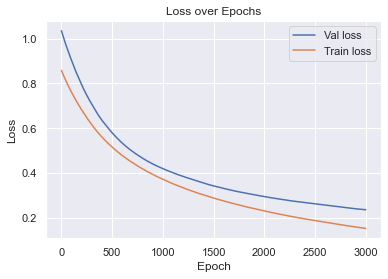

In [34]:
plot_loss(history) 

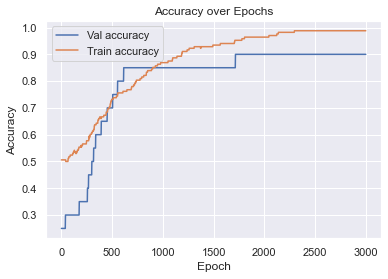

In [35]:
plot_accuracy(history)

#### RMSprop optimizer with learning rate of 0.00001 and epoch of 3000

In [36]:
### Using RMSprop optimizer with 3000 epoch and learning rate = 0.00001
model_RMS = classifier_model()
model_RMS.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001), 
                   loss='binary_crossentropy', metrics=['accuracy'])
model_RMS.summary()
history = model_RMS.fit(X_train, y_train, epochs=3000,  validation_split=0.106)
test_loss, test_acc = model_RMS.evaluate(X_test, y_test)
print('\nTest Acc- {:.4f}: \n'.format(test_acc))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                1952      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 1,985
Trainable params: 1,985
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3000
6/6 [==============================] - 0s 21ms/step - loss: 0.8629 - accuracy: 0.3988 - val_loss: 0.9569 - val_accuracy: 0.2000
Epoch 2/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.8611 - accuracy: 0.3988 - val_loss: 0.9555 - val_accuracy: 0.2000
Epoch 3/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.8598 - accuracy: 0.3988 - val_loss: 0.9544 - val_accuracy: 0.2000
Epoch 4/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.8587 - accuracy: 0.

Epoch 55/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.8116 - accuracy: 0.4524 - val_loss: 0.9055 - val_accuracy: 0.3500
Epoch 56/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.8108 - accuracy: 0.4524 - val_loss: 0.9045 - val_accuracy: 0.3500
Epoch 57/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.8099 - accuracy: 0.4524 - val_loss: 0.9036 - val_accuracy: 0.3500
Epoch 58/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.8091 - accuracy: 0.4524 - val_loss: 0.9027 - val_accuracy: 0.3500
Epoch 59/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.8082 - accuracy: 0.4524 - val_loss: 0.9018 - val_accuracy: 0.3500
Epoch 60/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.8073 - accuracy: 0.4583 - val_loss: 0.9009 - val_accuracy: 0.3500
Epoch 61/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.8064 - accuracy: 0.4583 - val_loss: 0.9001 - val_accuracy: 0.3500
Epoch 62/3000

6/6 [==============================] - 0s 12ms/step - loss: 0.7631 - accuracy: 0.5119 - val_loss: 0.8557 - val_accuracy: 0.4000
Epoch 114/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.7623 - accuracy: 0.5119 - val_loss: 0.8551 - val_accuracy: 0.4000
Epoch 115/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.7616 - accuracy: 0.5119 - val_loss: 0.8543 - val_accuracy: 0.4000
Epoch 116/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.7608 - accuracy: 0.5119 - val_loss: 0.8535 - val_accuracy: 0.4000
Epoch 117/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.7600 - accuracy: 0.5119 - val_loss: 0.8528 - val_accuracy: 0.4000
Epoch 118/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.7593 - accuracy: 0.5119 - val_loss: 0.8519 - val_accuracy: 0.4000
Epoch 119/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.7584 - accuracy: 0.5119 - val_loss: 0.8512 - val_accuracy: 0.4000
Epoch 120/3000
6/6 [

Epoch 171/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.7193 - accuracy: 0.5536 - val_loss: 0.8104 - val_accuracy: 0.4000
Epoch 172/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.7186 - accuracy: 0.5536 - val_loss: 0.8097 - val_accuracy: 0.4000
Epoch 173/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.7179 - accuracy: 0.5536 - val_loss: 0.8088 - val_accuracy: 0.4000
Epoch 174/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.7171 - accuracy: 0.5536 - val_loss: 0.8080 - val_accuracy: 0.4000
Epoch 175/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.7164 - accuracy: 0.5536 - val_loss: 0.8073 - val_accuracy: 0.4000
Epoch 176/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.7157 - accuracy: 0.5536 - val_loss: 0.8065 - val_accuracy: 0.4000
Epoch 177/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.7149 - accuracy: 0.5536 - val_loss: 0.8058 - val_accuracy: 0.4000
Epoch 

Epoch 286/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.6456 - accuracy: 0.5952 - val_loss: 0.7313 - val_accuracy: 0.5000
Epoch 287/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.6451 - accuracy: 0.5952 - val_loss: 0.7307 - val_accuracy: 0.5000
Epoch 288/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.6446 - accuracy: 0.5952 - val_loss: 0.7301 - val_accuracy: 0.5000
Epoch 289/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.6440 - accuracy: 0.5952 - val_loss: 0.7295 - val_accuracy: 0.5000
Epoch 290/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.6435 - accuracy: 0.5952 - val_loss: 0.7288 - val_accuracy: 0.5000
Epoch 291/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.6429 - accuracy: 0.5952 - val_loss: 0.7282 - val_accuracy: 0.5000
Epoch 292/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.6424 - accuracy: 0.5952 - val_loss: 0.7276 - val_accuracy: 0.5000
Epoch 

Epoch 344/3000
6/6 [==============================] - 0s 9ms/step - loss: 0.6145 - accuracy: 0.6250 - val_loss: 0.6973 - val_accuracy: 0.5000
Epoch 345/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.6140 - accuracy: 0.6250 - val_loss: 0.6968 - val_accuracy: 0.5000
Epoch 346/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.6135 - accuracy: 0.6250 - val_loss: 0.6963 - val_accuracy: 0.5000
Epoch 347/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.6130 - accuracy: 0.6250 - val_loss: 0.6957 - val_accuracy: 0.5000
Epoch 348/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.6124 - accuracy: 0.6310 - val_loss: 0.6952 - val_accuracy: 0.5000
Epoch 349/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.6119 - accuracy: 0.6369 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 350/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.6115 - accuracy: 0.6369 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 

Epoch 402/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.5867 - accuracy: 0.6429 - val_loss: 0.6674 - val_accuracy: 0.6000
Epoch 403/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.5862 - accuracy: 0.6429 - val_loss: 0.6669 - val_accuracy: 0.6000
Epoch 404/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.5857 - accuracy: 0.6429 - val_loss: 0.6664 - val_accuracy: 0.6000
Epoch 405/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.5853 - accuracy: 0.6429 - val_loss: 0.6659 - val_accuracy: 0.6000
Epoch 406/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.5848 - accuracy: 0.6429 - val_loss: 0.6654 - val_accuracy: 0.6000
Epoch 407/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.5843 - accuracy: 0.6429 - val_loss: 0.6649 - val_accuracy: 0.6000
Epoch 408/3000
6/6 [==============================] - 0s 9ms/step - loss: 0.5839 - accuracy: 0.6429 - val_loss: 0.6644 - val_accuracy: 0.6000
Epoch 

Epoch 460/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.5610 - accuracy: 0.6726 - val_loss: 0.6391 - val_accuracy: 0.6000
Epoch 461/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.5606 - accuracy: 0.6726 - val_loss: 0.6387 - val_accuracy: 0.6000
Epoch 462/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.5602 - accuracy: 0.6726 - val_loss: 0.6383 - val_accuracy: 0.6000
Epoch 463/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.5598 - accuracy: 0.6726 - val_loss: 0.6378 - val_accuracy: 0.6000
Epoch 464/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.5594 - accuracy: 0.6726 - val_loss: 0.6373 - val_accuracy: 0.6000
Epoch 465/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.5590 - accuracy: 0.6726 - val_loss: 0.6368 - val_accuracy: 0.6000
Epoch 466/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.5585 - accuracy: 0.6786 - val_loss: 0.6364 - val_accuracy: 0.6000
Epoch 

Epoch 518/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.5380 - accuracy: 0.7321 - val_loss: 0.6144 - val_accuracy: 0.6500
Epoch 519/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.5376 - accuracy: 0.7321 - val_loss: 0.6140 - val_accuracy: 0.6500
Epoch 520/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.5372 - accuracy: 0.7321 - val_loss: 0.6136 - val_accuracy: 0.6500
Epoch 521/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.5368 - accuracy: 0.7321 - val_loss: 0.6132 - val_accuracy: 0.6500
Epoch 522/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.5365 - accuracy: 0.7321 - val_loss: 0.6128 - val_accuracy: 0.6500
Epoch 523/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.5361 - accuracy: 0.7321 - val_loss: 0.6124 - val_accuracy: 0.6500
Epoch 524/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.5357 - accuracy: 0.7321 - val_loss: 0.6120 - val_accuracy: 0.6500
Epoch 

Epoch 576/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.5170 - accuracy: 0.7381 - val_loss: 0.5925 - val_accuracy: 0.7000
Epoch 577/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.5167 - accuracy: 0.7381 - val_loss: 0.5921 - val_accuracy: 0.7000
Epoch 578/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.5163 - accuracy: 0.7381 - val_loss: 0.5918 - val_accuracy: 0.7000
Epoch 579/3000
6/6 [==============================] - 0s 9ms/step - loss: 0.5160 - accuracy: 0.7381 - val_loss: 0.5914 - val_accuracy: 0.7000
Epoch 580/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.5156 - accuracy: 0.7381 - val_loss: 0.5911 - val_accuracy: 0.7000
Epoch 581/3000
6/6 [==============================] - 0s 10ms/step - loss: 0.5153 - accuracy: 0.7381 - val_loss: 0.5907 - val_accuracy: 0.7000
Epoch 582/3000
6/6 [==============================] - 0s 9ms/step - loss: 0.5149 - accuracy: 0.7381 - val_loss: 0.5903 - val_accuracy: 0.7000
Epoch

6/6 [==============================] - 0s 8ms/step - loss: 0.4808 - accuracy: 0.7798 - val_loss: 0.5547 - val_accuracy: 0.7500
Epoch 691/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.4806 - accuracy: 0.7798 - val_loss: 0.5544 - val_accuracy: 0.7500
Epoch 692/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.4803 - accuracy: 0.7798 - val_loss: 0.5541 - val_accuracy: 0.7500
Epoch 693/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.4800 - accuracy: 0.7798 - val_loss: 0.5538 - val_accuracy: 0.7500
Epoch 694/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.4797 - accuracy: 0.7798 - val_loss: 0.5535 - val_accuracy: 0.7500
Epoch 695/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.4794 - accuracy: 0.7798 - val_loss: 0.5532 - val_accuracy: 0.7500
Epoch 696/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.4791 - accuracy: 0.7798 - val_loss: 0.5529 - val_accuracy: 0.7500
Epoch 697/3000
6/6 [=

Epoch 805/3000
6/6 [==============================] - 0s 9ms/step - loss: 0.4498 - accuracy: 0.7917 - val_loss: 0.5238 - val_accuracy: 0.8500
Epoch 806/3000
6/6 [==============================] - 0s 9ms/step - loss: 0.4496 - accuracy: 0.7917 - val_loss: 0.5236 - val_accuracy: 0.8500
Epoch 807/3000
6/6 [==============================] - 0s 10ms/step - loss: 0.4493 - accuracy: 0.7917 - val_loss: 0.5234 - val_accuracy: 0.8500
Epoch 808/3000
6/6 [==============================] - 0s 9ms/step - loss: 0.4490 - accuracy: 0.7917 - val_loss: 0.5231 - val_accuracy: 0.8500
Epoch 809/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.4488 - accuracy: 0.7917 - val_loss: 0.5229 - val_accuracy: 0.8500
Epoch 810/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.4485 - accuracy: 0.7917 - val_loss: 0.5226 - val_accuracy: 0.8500
Epoch 811/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.4483 - accuracy: 0.7917 - val_loss: 0.5224 - val_accuracy: 0.8500
Epoch

6/6 [==============================] - 0s 10ms/step - loss: 0.4227 - accuracy: 0.8274 - val_loss: 0.4980 - val_accuracy: 0.8500
Epoch 920/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.4225 - accuracy: 0.8274 - val_loss: 0.4978 - val_accuracy: 0.8500
Epoch 921/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.4223 - accuracy: 0.8274 - val_loss: 0.4975 - val_accuracy: 0.8500
Epoch 922/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.4220 - accuracy: 0.8274 - val_loss: 0.4973 - val_accuracy: 0.8500
Epoch 923/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.4218 - accuracy: 0.8274 - val_loss: 0.4971 - val_accuracy: 0.8500
Epoch 924/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.4216 - accuracy: 0.8274 - val_loss: 0.4969 - val_accuracy: 0.8500
Epoch 925/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.4214 - accuracy: 0.8333 - val_loss: 0.4966 - val_accuracy: 0.8500
Epoch 926/3000
6/6 [

Epoch 977/3000
6/6 [==============================] - 0s 9ms/step - loss: 0.4100 - accuracy: 0.8393 - val_loss: 0.4860 - val_accuracy: 0.8500
Epoch 978/3000
6/6 [==============================] - 0s 10ms/step - loss: 0.4098 - accuracy: 0.8393 - val_loss: 0.4858 - val_accuracy: 0.8500
Epoch 979/3000
6/6 [==============================] - 0s 10ms/step - loss: 0.4096 - accuracy: 0.8452 - val_loss: 0.4856 - val_accuracy: 0.8500
Epoch 980/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.4093 - accuracy: 0.8452 - val_loss: 0.4854 - val_accuracy: 0.8500
Epoch 981/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.4091 - accuracy: 0.8452 - val_loss: 0.4851 - val_accuracy: 0.8500
Epoch 982/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.4089 - accuracy: 0.8452 - val_loss: 0.4850 - val_accuracy: 0.8500
Epoch 983/3000
6/6 [==============================] - 0s 9ms/step - loss: 0.4087 - accuracy: 0.8452 - val_loss: 0.4848 - val_accuracy: 0.8500
Epoc

6/6 [==============================] - 0s 8ms/step - loss: 0.3866 - accuracy: 0.8631 - val_loss: 0.4649 - val_accuracy: 0.8500
Epoch 1092/3000
6/6 [==============================] - 0s 10ms/step - loss: 0.3864 - accuracy: 0.8631 - val_loss: 0.4647 - val_accuracy: 0.8500
Epoch 1093/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.3862 - accuracy: 0.8631 - val_loss: 0.4646 - val_accuracy: 0.8500
Epoch 1094/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.3860 - accuracy: 0.8631 - val_loss: 0.4644 - val_accuracy: 0.8500
Epoch 1095/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.3858 - accuracy: 0.8631 - val_loss: 0.4642 - val_accuracy: 0.8500
Epoch 1096/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.3856 - accuracy: 0.8631 - val_loss: 0.4640 - val_accuracy: 0.8500
Epoch 1097/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.3854 - accuracy: 0.8631 - val_loss: 0.4639 - val_accuracy: 0.8500
Epoch 1098/300

6/6 [==============================] - 0s 6ms/step - loss: 0.3653 - accuracy: 0.8690 - val_loss: 0.4470 - val_accuracy: 0.8500
Epoch 1206/3000
6/6 [==============================] - 0s 11ms/step - loss: 0.3651 - accuracy: 0.8690 - val_loss: 0.4469 - val_accuracy: 0.8500
Epoch 1207/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.3649 - accuracy: 0.8690 - val_loss: 0.4467 - val_accuracy: 0.8500
Epoch 1208/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.3647 - accuracy: 0.8690 - val_loss: 0.4466 - val_accuracy: 0.8500
Epoch 1209/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.3646 - accuracy: 0.8690 - val_loss: 0.4464 - val_accuracy: 0.8500
Epoch 1210/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.3644 - accuracy: 0.8690 - val_loss: 0.4462 - val_accuracy: 0.8500
Epoch 1211/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.3642 - accuracy: 0.8690 - val_loss: 0.4461 - val_accuracy: 0.8500
Epoch 1212/300

6/6 [==============================] - 0s 7ms/step - loss: 0.3461 - accuracy: 0.8750 - val_loss: 0.4307 - val_accuracy: 0.8500
Epoch 1320/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.3460 - accuracy: 0.8750 - val_loss: 0.4306 - val_accuracy: 0.8500
Epoch 1321/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.3458 - accuracy: 0.8750 - val_loss: 0.4304 - val_accuracy: 0.8500
Epoch 1322/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.3456 - accuracy: 0.8750 - val_loss: 0.4303 - val_accuracy: 0.8500
Epoch 1323/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.3455 - accuracy: 0.8750 - val_loss: 0.4300 - val_accuracy: 0.8500
Epoch 1324/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.3453 - accuracy: 0.8750 - val_loss: 0.4299 - val_accuracy: 0.8500
Epoch 1325/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.3452 - accuracy: 0.8750 - val_loss: 0.4298 - val_accuracy: 0.8500
Epoch 1326/3000

6/6 [==============================] - 0s 9ms/step - loss: 0.3288 - accuracy: 0.8810 - val_loss: 0.4171 - val_accuracy: 0.8500
Epoch 1434/3000
6/6 [==============================] - 0s 10ms/step - loss: 0.3286 - accuracy: 0.8810 - val_loss: 0.4169 - val_accuracy: 0.8500
Epoch 1435/3000
6/6 [==============================] - 0s 9ms/step - loss: 0.3285 - accuracy: 0.8810 - val_loss: 0.4168 - val_accuracy: 0.8500
Epoch 1436/3000
6/6 [==============================] - 0s 9ms/step - loss: 0.3283 - accuracy: 0.8810 - val_loss: 0.4167 - val_accuracy: 0.8500
Epoch 1437/3000
6/6 [==============================] - 0s 9ms/step - loss: 0.3282 - accuracy: 0.8810 - val_loss: 0.4166 - val_accuracy: 0.8500
Epoch 1438/3000
6/6 [==============================] - 0s 9ms/step - loss: 0.3280 - accuracy: 0.8810 - val_loss: 0.4165 - val_accuracy: 0.8500
Epoch 1439/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.3279 - accuracy: 0.8810 - val_loss: 0.4164 - val_accuracy: 0.8500
Epoch 1440/300

6/6 [==============================] - 0s 7ms/step - loss: 0.3127 - accuracy: 0.8929 - val_loss: 0.4056 - val_accuracy: 0.8500
Epoch 1548/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.3125 - accuracy: 0.8929 - val_loss: 0.4055 - val_accuracy: 0.8500
Epoch 1549/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.3124 - accuracy: 0.8929 - val_loss: 0.4053 - val_accuracy: 0.8500
Epoch 1550/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.3123 - accuracy: 0.8929 - val_loss: 0.4052 - val_accuracy: 0.8500
Epoch 1551/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.3121 - accuracy: 0.8929 - val_loss: 0.4051 - val_accuracy: 0.8500
Epoch 1552/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.3120 - accuracy: 0.8929 - val_loss: 0.4050 - val_accuracy: 0.8500
Epoch 1553/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.3119 - accuracy: 0.8929 - val_loss: 0.4050 - val_accuracy: 0.8500
Epoch 1554/3000

6/6 [==============================] - 0s 7ms/step - loss: 0.2977 - accuracy: 0.9107 - val_loss: 0.3954 - val_accuracy: 0.9000
Epoch 1662/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.2976 - accuracy: 0.9107 - val_loss: 0.3953 - val_accuracy: 0.9000
Epoch 1663/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2975 - accuracy: 0.9107 - val_loss: 0.3952 - val_accuracy: 0.9000
Epoch 1664/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2973 - accuracy: 0.9107 - val_loss: 0.3950 - val_accuracy: 0.9000
Epoch 1665/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2972 - accuracy: 0.9107 - val_loss: 0.3950 - val_accuracy: 0.9000
Epoch 1666/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2971 - accuracy: 0.9107 - val_loss: 0.3949 - val_accuracy: 0.9000
Epoch 1667/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2969 - accuracy: 0.9107 - val_loss: 0.3949 - val_accuracy: 0.9000
Epoch 1668/3000

6/6 [==============================] - 0s 6ms/step - loss: 0.2904 - accuracy: 0.9167 - val_loss: 0.3904 - val_accuracy: 0.9000
Epoch 1719/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.2903 - accuracy: 0.9167 - val_loss: 0.3903 - val_accuracy: 0.9000
Epoch 1720/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2902 - accuracy: 0.9167 - val_loss: 0.3903 - val_accuracy: 0.9000
Epoch 1721/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2901 - accuracy: 0.9167 - val_loss: 0.3901 - val_accuracy: 0.9000
Epoch 1722/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2899 - accuracy: 0.9167 - val_loss: 0.3900 - val_accuracy: 0.9000
Epoch 1723/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2898 - accuracy: 0.9167 - val_loss: 0.3898 - val_accuracy: 0.9000
Epoch 1724/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.2897 - accuracy: 0.9167 - val_loss: 0.3898 - val_accuracy: 0.9000
Epoch 1725/3000

6/6 [==============================] - 0s 7ms/step - loss: 0.2836 - accuracy: 0.9167 - val_loss: 0.3856 - val_accuracy: 0.9000
Epoch 1776/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2835 - accuracy: 0.9167 - val_loss: 0.3856 - val_accuracy: 0.9000
Epoch 1777/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2833 - accuracy: 0.9167 - val_loss: 0.3855 - val_accuracy: 0.9000
Epoch 1778/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2832 - accuracy: 0.9167 - val_loss: 0.3855 - val_accuracy: 0.9000
Epoch 1779/3000
6/6 [==============================] - 0s 9ms/step - loss: 0.2831 - accuracy: 0.9167 - val_loss: 0.3853 - val_accuracy: 0.9000
Epoch 1780/3000
6/6 [==============================] - 0s 9ms/step - loss: 0.2830 - accuracy: 0.9167 - val_loss: 0.3852 - val_accuracy: 0.9000
Epoch 1781/3000
6/6 [==============================] - 0s 9ms/step - loss: 0.2829 - accuracy: 0.9167 - val_loss: 0.3852 - val_accuracy: 0.9000
Epoch 1782/3000

6/6 [==============================] - 0s 7ms/step - loss: 0.2704 - accuracy: 0.9226 - val_loss: 0.3780 - val_accuracy: 0.9500
Epoch 1890/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.2703 - accuracy: 0.9226 - val_loss: 0.3779 - val_accuracy: 0.9500
Epoch 1891/3000
6/6 [==============================] - 0s 33ms/step - loss: 0.2702 - accuracy: 0.9226 - val_loss: 0.3779 - val_accuracy: 0.9500
Epoch 1892/3000
6/6 [==============================] - 0s 9ms/step - loss: 0.2700 - accuracy: 0.9226 - val_loss: 0.3778 - val_accuracy: 0.9500
Epoch 1893/3000
6/6 [==============================] - 0s 9ms/step - loss: 0.2699 - accuracy: 0.9226 - val_loss: 0.3777 - val_accuracy: 0.9500
Epoch 1894/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.2698 - accuracy: 0.9226 - val_loss: 0.3777 - val_accuracy: 0.9500
Epoch 1895/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.2697 - accuracy: 0.9226 - val_loss: 0.3777 - val_accuracy: 0.9500
Epoch 1896/300

6/6 [==============================] - 0s 8ms/step - loss: 0.2581 - accuracy: 0.9286 - val_loss: 0.3716 - val_accuracy: 0.9500
Epoch 2004/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2579 - accuracy: 0.9286 - val_loss: 0.3715 - val_accuracy: 0.9500
Epoch 2005/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2578 - accuracy: 0.9286 - val_loss: 0.3714 - val_accuracy: 0.9500
Epoch 2006/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.2577 - accuracy: 0.9286 - val_loss: 0.3713 - val_accuracy: 0.9500
Epoch 2007/3000
6/6 [==============================] - 0s 9ms/step - loss: 0.2576 - accuracy: 0.9286 - val_loss: 0.3712 - val_accuracy: 0.9500
Epoch 2008/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2575 - accuracy: 0.9286 - val_loss: 0.3712 - val_accuracy: 0.9500
Epoch 2009/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2574 - accuracy: 0.9286 - val_loss: 0.3711 - val_accuracy: 0.9500
Epoch 2010/3000

6/6 [==============================] - 0s 8ms/step - loss: 0.2466 - accuracy: 0.9286 - val_loss: 0.3650 - val_accuracy: 0.9500
Epoch 2118/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.2465 - accuracy: 0.9286 - val_loss: 0.3649 - val_accuracy: 0.9500
Epoch 2119/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2464 - accuracy: 0.9286 - val_loss: 0.3649 - val_accuracy: 0.9500
Epoch 2120/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2463 - accuracy: 0.9286 - val_loss: 0.3649 - val_accuracy: 0.9500
Epoch 2121/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.2462 - accuracy: 0.9286 - val_loss: 0.3648 - val_accuracy: 0.9500
Epoch 2122/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2461 - accuracy: 0.9286 - val_loss: 0.3647 - val_accuracy: 0.9500
Epoch 2123/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2460 - accuracy: 0.9286 - val_loss: 0.3648 - val_accuracy: 0.9500
Epoch 2124/3000

6/6 [==============================] - 0s 9ms/step - loss: 0.2359 - accuracy: 0.9286 - val_loss: 0.3600 - val_accuracy: 0.9500
Epoch 2232/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2358 - accuracy: 0.9286 - val_loss: 0.3600 - val_accuracy: 0.9500
Epoch 2233/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2358 - accuracy: 0.9286 - val_loss: 0.3600 - val_accuracy: 0.9500
Epoch 2234/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2357 - accuracy: 0.9286 - val_loss: 0.3600 - val_accuracy: 0.9500
Epoch 2235/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2356 - accuracy: 0.9286 - val_loss: 0.3600 - val_accuracy: 0.9500
Epoch 2236/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.2355 - accuracy: 0.9345 - val_loss: 0.3599 - val_accuracy: 0.9500
Epoch 2237/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2354 - accuracy: 0.9345 - val_loss: 0.3598 - val_accuracy: 0.9500
Epoch 2238/3000

6/6 [==============================] - 0s 8ms/step - loss: 0.2308 - accuracy: 0.9345 - val_loss: 0.3576 - val_accuracy: 0.9500
Epoch 2289/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2307 - accuracy: 0.9345 - val_loss: 0.3575 - val_accuracy: 0.9500
Epoch 2290/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2307 - accuracy: 0.9345 - val_loss: 0.3574 - val_accuracy: 0.9500
Epoch 2291/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2306 - accuracy: 0.9345 - val_loss: 0.3573 - val_accuracy: 0.9500
Epoch 2292/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2305 - accuracy: 0.9345 - val_loss: 0.3573 - val_accuracy: 0.9500
Epoch 2293/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.2304 - accuracy: 0.9345 - val_loss: 0.3573 - val_accuracy: 0.9500
Epoch 2294/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2303 - accuracy: 0.9345 - val_loss: 0.3573 - val_accuracy: 0.9500
Epoch 2295/3000

6/6 [==============================] - 0s 8ms/step - loss: 0.2208 - accuracy: 0.9405 - val_loss: 0.3530 - val_accuracy: 0.9500
Epoch 2403/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2207 - accuracy: 0.9405 - val_loss: 0.3529 - val_accuracy: 0.9500
Epoch 2404/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.2206 - accuracy: 0.9405 - val_loss: 0.3530 - val_accuracy: 0.9500
Epoch 2405/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2205 - accuracy: 0.9405 - val_loss: 0.3529 - val_accuracy: 0.9500
Epoch 2406/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2204 - accuracy: 0.9405 - val_loss: 0.3529 - val_accuracy: 0.9500
Epoch 2407/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2203 - accuracy: 0.9405 - val_loss: 0.3528 - val_accuracy: 0.9500
Epoch 2408/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2203 - accuracy: 0.9405 - val_loss: 0.3527 - val_accuracy: 0.9500
Epoch 2409/3000

6/6 [==============================] - 0s 8ms/step - loss: 0.2159 - accuracy: 0.9464 - val_loss: 0.3506 - val_accuracy: 0.9500
Epoch 2460/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.2158 - accuracy: 0.9464 - val_loss: 0.3506 - val_accuracy: 0.9500
Epoch 2461/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2158 - accuracy: 0.9464 - val_loss: 0.3506 - val_accuracy: 0.9500
Epoch 2462/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2157 - accuracy: 0.9464 - val_loss: 0.3506 - val_accuracy: 0.9500
Epoch 2463/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2156 - accuracy: 0.9464 - val_loss: 0.3506 - val_accuracy: 0.9500
Epoch 2464/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2155 - accuracy: 0.9464 - val_loss: 0.3505 - val_accuracy: 0.9500
Epoch 2465/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2154 - accuracy: 0.9464 - val_loss: 0.3503 - val_accuracy: 0.9500
Epoch 2466/3000

6/6 [==============================] - 0s 8ms/step - loss: 0.2065 - accuracy: 0.9524 - val_loss: 0.3464 - val_accuracy: 0.9500
Epoch 2574/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2065 - accuracy: 0.9524 - val_loss: 0.3463 - val_accuracy: 0.9500
Epoch 2575/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2064 - accuracy: 0.9524 - val_loss: 0.3463 - val_accuracy: 0.9500
Epoch 2576/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2063 - accuracy: 0.9524 - val_loss: 0.3462 - val_accuracy: 0.9500
Epoch 2577/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2062 - accuracy: 0.9524 - val_loss: 0.3461 - val_accuracy: 0.9500
Epoch 2578/3000
6/6 [==============================] - 0s 9ms/step - loss: 0.2061 - accuracy: 0.9524 - val_loss: 0.3460 - val_accuracy: 0.9500
Epoch 2579/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.2061 - accuracy: 0.9524 - val_loss: 0.3460 - val_accuracy: 0.9500
Epoch 2580/3000

6/6 [==============================] - 0s 10ms/step - loss: 0.2020 - accuracy: 0.9583 - val_loss: 0.3441 - val_accuracy: 0.9500
Epoch 2631/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.2019 - accuracy: 0.9583 - val_loss: 0.3440 - val_accuracy: 0.9500
Epoch 2632/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2019 - accuracy: 0.9583 - val_loss: 0.3441 - val_accuracy: 0.9500
Epoch 2633/3000
6/6 [==============================] - 0s 9ms/step - loss: 0.2018 - accuracy: 0.9583 - val_loss: 0.3440 - val_accuracy: 0.9500
Epoch 2634/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2017 - accuracy: 0.9583 - val_loss: 0.3439 - val_accuracy: 0.9500
Epoch 2635/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2016 - accuracy: 0.9583 - val_loss: 0.3439 - val_accuracy: 0.9500
Epoch 2636/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.2015 - accuracy: 0.9583 - val_loss: 0.3438 - val_accuracy: 0.9500
Epoch 2637/300

6/6 [==============================] - 0s 8ms/step - loss: 0.1931 - accuracy: 0.9583 - val_loss: 0.3407 - val_accuracy: 0.9500
Epoch 2745/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.1930 - accuracy: 0.9583 - val_loss: 0.3406 - val_accuracy: 0.9500
Epoch 2746/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.1929 - accuracy: 0.9583 - val_loss: 0.3406 - val_accuracy: 0.9500
Epoch 2747/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.1929 - accuracy: 0.9583 - val_loss: 0.3406 - val_accuracy: 0.9500
Epoch 2748/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.1928 - accuracy: 0.9583 - val_loss: 0.3405 - val_accuracy: 0.9500
Epoch 2749/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.1927 - accuracy: 0.9583 - val_loss: 0.3404 - val_accuracy: 0.9500
Epoch 2750/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.1927 - accuracy: 0.9583 - val_loss: 0.3404 - val_accuracy: 0.9500
Epoch 2751/3000

6/6 [==============================] - 0s 8ms/step - loss: 0.1846 - accuracy: 0.9702 - val_loss: 0.3374 - val_accuracy: 0.9500
Epoch 2859/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.1845 - accuracy: 0.9702 - val_loss: 0.3373 - val_accuracy: 0.9500
Epoch 2860/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.1844 - accuracy: 0.9702 - val_loss: 0.3373 - val_accuracy: 0.9500
Epoch 2861/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.1844 - accuracy: 0.9702 - val_loss: 0.3373 - val_accuracy: 0.9500
Epoch 2862/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.1843 - accuracy: 0.9702 - val_loss: 0.3373 - val_accuracy: 0.9500
Epoch 2863/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.1842 - accuracy: 0.9702 - val_loss: 0.3372 - val_accuracy: 0.9500
Epoch 2864/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.1841 - accuracy: 0.9702 - val_loss: 0.3371 - val_accuracy: 0.9500
Epoch 2865/3000

6/6 [==============================] - 0s 9ms/step - loss: 0.1766 - accuracy: 0.9762 - val_loss: 0.3339 - val_accuracy: 0.9500
Epoch 2973/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.1765 - accuracy: 0.9762 - val_loss: 0.3339 - val_accuracy: 0.9500
Epoch 2974/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.1764 - accuracy: 0.9762 - val_loss: 0.3340 - val_accuracy: 0.9500
Epoch 2975/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.1763 - accuracy: 0.9762 - val_loss: 0.3338 - val_accuracy: 0.9500
Epoch 2976/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.1763 - accuracy: 0.9762 - val_loss: 0.3338 - val_accuracy: 0.9500
Epoch 2977/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.1762 - accuracy: 0.9762 - val_loss: 0.3339 - val_accuracy: 0.9500
Epoch 2978/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.1761 - accuracy: 0.9762 - val_loss: 0.3339 - val_accuracy: 0.9500
Epoch 2979/3000

In [37]:
acc=0
v_acc = 0
for a in range(-5, 0, 1):
    acc = history.history['accuracy'][a] + acc
    v_acc = history.history['val_accuracy'][a] + v_acc
print('accuracy: ', round(acc/5, 4)*100,'%')
print('val accuracy: ', round(v_acc/5, 4)*100,'%')
print('test accuracy: ', round(test_acc,4)*100,'%')

accuracy:  97.61999999999999 %
val accuracy:  95.0 %
test accuracy:  95.0 %


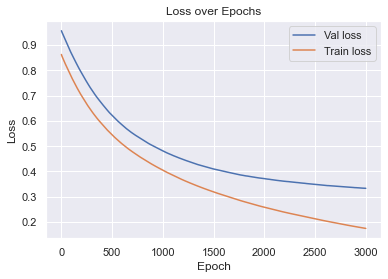

In [38]:
plot_loss(history) 

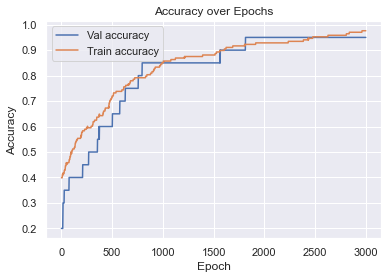

In [39]:
plot_accuracy(history)

#### SGD optimizer with learning rate of 0.01 and 500 epoch

In [40]:
### Train with SGD optimizer with 500 epochs and learning rate = 0.01
model_SGD = classifier_model()
model_SGD.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
model_SGD.summary()
history = model_SGD.fit(X_train, y_train, epochs=500,  validation_split=0.106)
test_loss, test_acc = model_SGD.evaluate(X_test, y_test)
print('\nTest Acc- {:.4f}: \n'.format(test_acc))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                1952      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 33        
Total params: 1,985
Trainable params: 1,985
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
6/6 [==============================] - 0s 19ms/step - loss: 0.9537 - accuracy: 0.3750 - val_loss: 0.8883 - val_accuracy: 0.2500
Epoch 2/500
6/6 [==============================] - 0s 7ms/step - loss: 0.9077 - accuracy: 0.3929 - val_loss: 0.8554 - val_accuracy: 0.3000
Epoch 3/500
6/6 [==============================] - 0s 7ms/step - loss: 0.8686 - accuracy: 0.4286 - val_loss: 0.8250 - val_accuracy: 0.3500
Epoch 4/500
6/6 [==============================] - 0s 7ms/step - loss: 0.8334 - accuracy: 0.4464

6/6 [==============================] - 0s 7ms/step - loss: 0.2241 - accuracy: 0.9524 - val_loss: 0.3315 - val_accuracy: 0.8500
Epoch 114/500
6/6 [==============================] - 0s 7ms/step - loss: 0.2226 - accuracy: 0.9524 - val_loss: 0.3326 - val_accuracy: 0.8500
Epoch 115/500
6/6 [==============================] - 0s 8ms/step - loss: 0.2210 - accuracy: 0.9524 - val_loss: 0.3303 - val_accuracy: 0.8500
Epoch 116/500
6/6 [==============================] - 0s 6ms/step - loss: 0.2196 - accuracy: 0.9524 - val_loss: 0.3297 - val_accuracy: 0.8500
Epoch 117/500
6/6 [==============================] - 0s 6ms/step - loss: 0.2177 - accuracy: 0.9524 - val_loss: 0.3282 - val_accuracy: 0.8500
Epoch 118/500
6/6 [==============================] - 0s 7ms/step - loss: 0.2159 - accuracy: 0.9524 - val_loss: 0.3273 - val_accuracy: 0.8500
Epoch 119/500
6/6 [==============================] - 0s 7ms/step - loss: 0.2143 - accuracy: 0.9524 - val_loss: 0.3279 - val_accuracy: 0.8500
Epoch 120/500
6/6 [========

6/6 [==============================] - 0s 8ms/step - loss: 0.1073 - accuracy: 1.0000 - val_loss: 0.3006 - val_accuracy: 0.8500
Epoch 230/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1067 - accuracy: 1.0000 - val_loss: 0.3009 - val_accuracy: 0.8500
Epoch 231/500
6/6 [==============================] - 0s 7ms/step - loss: 0.1061 - accuracy: 1.0000 - val_loss: 0.3016 - val_accuracy: 0.8500
Epoch 232/500
6/6 [==============================] - 0s 7ms/step - loss: 0.1055 - accuracy: 1.0000 - val_loss: 0.3015 - val_accuracy: 0.8500
Epoch 233/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1048 - accuracy: 1.0000 - val_loss: 0.3015 - val_accuracy: 0.8500
Epoch 234/500
6/6 [==============================] - 0s 7ms/step - loss: 0.1042 - accuracy: 1.0000 - val_loss: 0.3027 - val_accuracy: 0.8500
Epoch 235/500
6/6 [==============================] - 0s 7ms/step - loss: 0.1037 - accuracy: 1.0000 - val_loss: 0.3033 - val_accuracy: 0.8500
Epoch 236/500
6/6 [========

6/6 [==============================] - 0s 6ms/step - loss: 0.0604 - accuracy: 1.0000 - val_loss: 0.2983 - val_accuracy: 0.8500
Epoch 346/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0601 - accuracy: 1.0000 - val_loss: 0.2971 - val_accuracy: 0.8500
Epoch 347/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0599 - accuracy: 1.0000 - val_loss: 0.2965 - val_accuracy: 0.8500
Epoch 348/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0596 - accuracy: 1.0000 - val_loss: 0.2965 - val_accuracy: 0.8500
Epoch 349/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0594 - accuracy: 1.0000 - val_loss: 0.2954 - val_accuracy: 0.8500
Epoch 350/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0591 - accuracy: 1.0000 - val_loss: 0.2956 - val_accuracy: 0.9000
Epoch 351/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0588 - accuracy: 1.0000 - val_loss: 0.2958 - val_accuracy: 0.9000
Epoch 352/500
6/6 [========

6/6 [==============================] - 0s 7ms/step - loss: 0.0385 - accuracy: 1.0000 - val_loss: 0.2978 - val_accuracy: 0.9000
Epoch 462/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0384 - accuracy: 1.0000 - val_loss: 0.2980 - val_accuracy: 0.9000
Epoch 463/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0383 - accuracy: 1.0000 - val_loss: 0.2970 - val_accuracy: 0.9000
Epoch 464/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0381 - accuracy: 1.0000 - val_loss: 0.2970 - val_accuracy: 0.9000
Epoch 465/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0380 - accuracy: 1.0000 - val_loss: 0.2969 - val_accuracy: 0.9000
Epoch 466/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0379 - accuracy: 1.0000 - val_loss: 0.2954 - val_accuracy: 0.9000
Epoch 467/500
6/6 [==============================] - 0s 8ms/step - loss: 0.0377 - accuracy: 1.0000 - val_loss: 0.2970 - val_accuracy: 0.9000
Epoch 468/500
6/6 [========

In [41]:
acc=0
v_acc = 0
for a in range(-5, 0, 1):
    acc = history.history['accuracy'][a] + acc
    v_acc = history.history['val_accuracy'][a] + v_acc
print('accuracy: ', round(acc/5, 4)*100,'%')
print('val accuracy: ', round(v_acc/5, 4)*100,'%')
print('test accuracy: ', round(test_acc,4)*100,'%')

accuracy:  100.0 %
val accuracy:  90.0 %
test accuracy:  90.0 %


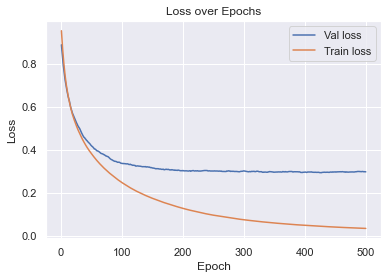

In [42]:
plot_loss(history) 

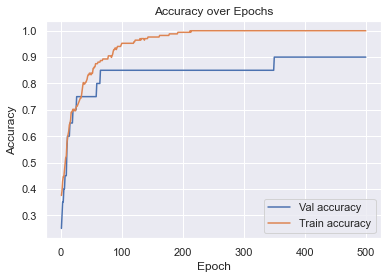

In [43]:
plot_accuracy(history)

#### Results as shown:
Data distribution: Training Data = 168, Validation Data = 20, Test Data = 20

                                 Training Accuracy      Validation Accuracy     Test Accuracy      Comment
      SGD optimizer LR=Default         98.81%                  90%                  90%            
      RMS optimizer LR=Default         100%                    90%                  90%            overfit       
      Adam optimizer LR=Default        100%                    95%                  85%            slightly overfit
      SGD optimizer LR=0.01            100%                    90%                  90%                               
      RMS optimizer LR=0.00001         97.62%                  95%                  95%           
      Adam optimizer LR=0.00001        98.81%                  90%                  90%            

### Conclusion

Based on the summary of results, SGD optimizer with default learning rate can achieve reasonable performance as compare to Adam optimizer with a leaning rate of 0.00001. The RMSprop with learning rate of 0.00001 slightly perform better during validation and testing. 
Overall, the model with one hidden layer of 32 nodes and 1 nodes at the output can classify rocks and mine with an accuracy of 90%. 
It is best to try the model with an unseen dataset and check the performance. 

##### Note:
1. As for the unseen dataset, the data need to make sure all attribute have a value, label encode the output class, transform (standard scaler) the attribute and feed it to the model and check the accuracy.
2. As for some of the fit have a longer epoch, callback and patient were never used. The purpose was to check if it will be overfit. 